In [1]:
%load_ext autoreload
%autoreload 2

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from dice_rl_TU_Vienna.latex import latex_labels
from dice_rl_TU_Vienna.value import get_get_policy_value_dataset
from dice_rl_TU_Vienna.plot.continuous import get_logs, plot_log
from plugins.medical_rl.sepsis_amsterdam.continuous.config import *
from plugins.medical_rl.sepsis_amsterdam.continuous.plot import get_plot_logs

In [ ]:
get_behavior_policy_value, _ = get_get_policy_value_dataset(dataset)

# Selected Plots

## Exploratory

In [455]:
def plot_single(algorithm, gamma, batchs, hd, lr, xlim=None, ylim1=None, ylim2=None, yscale=False, axvspan=None):
    log = get_logs(
        log_dir=os.path.join(
            outputs_dir, hparam_str_dataframe, hparam_str_policy, hparam_str_dataset,
            algorithm,
            f"gam{gamma}_batchs{batchs}_seed0_hdp{hd}_hdd{hd}_lrp{lr}_lrd{lr}_regp0.0_regd0.0_nlr{lr}_nreg1.0",
        ),
    )

    _, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 5))

    y = get_behavior_policy_value(gamma) / (1 - gamma)
    ax1.axhline(y=y, label="OnPE behavior", color="black", linestyle=":")

    x = np.array(log["data"]["pv_s"]["steps"])
    y = np.array(log["data"]["pv_s"]["values"]) / (1 - gamma)
    if yscale: ax1.semilogy(x, y, label="simple")
    else:      ax1.plot    (x, y, label="simple")

    x = np.array(log["data"]["pv_w"]["steps"])
    y = np.array(log["data"]["pv_w"]["values"]) / (1 - gamma)
    if yscale: ax1.semilogy(x, y, label="weighted")
    else:      ax1.plot    (x, y, label="weighted")

    x = np.array(log["data"]["loss"]["steps"])
    y = np.array(log["data"]["loss"]["values"])
    ax2.plot(x, y, color="black")

    ax1.set_ylabel( latex_labels["pv_scaled"]() )
    ax2.set_ylabel( latex_labels["loss"]("") )

    if xlim is not None:
        ax1.set_xlim(xlim)
        ax2.set_xlim(xlim)
    if ylim1 is not None: ax1.set_ylim(ylim1)
    if ylim2 is not None: ax2.set_ylim(ylim2)

    if axvspan is not None:
        ax1.axvspan(*axvspan, color="black", alpha=0.1)
        ax2.axvspan(*axvspan, color="black", alpha=0.1)

    title_hparams = [ f"gamma={gamma}", f"batch size={batchs}", f"hidden dimensions={hd}", f"learning rate={lr}", ]

    suptitle = algorithm + "\n" + ", ".join(title_hparams)
    plt.suptitle(suptitle)

    plt.xlabel("step")

    ax1.legend()

    ax1.grid(linestyle=":")
    ax2.grid(linestyle=":")

    file_name = algorithm + "; " + ", ".join(title_hparams)
    path = os.path.join(save_dir_images, f"{file_name}.png")
    plt.savefig(path)

    plt.show()

Getting log: data/medical_rl/outputs/split=(0.4, 0.1, 0.5)_seed=42/n_neurons=1024_learning_rate=0.0001_batch_size=512_gamma=0.99/n_pads=1/NeuralGenDice/gam0.9_batchs1024_seed0_hdp(32,)_hdd(32,)_lrpPCDec([27500], [0.0001, 1e-05])_lrdPCDec([27500], [0.0001, 1e-05])_regp0.0_regd0.0_nlrPCDec([27500], [0.0001, 1e-05])_nreg1.0/events.out.tfevents.1731323254.MacBook-Pro-von-Richard.local.43891.0.v2


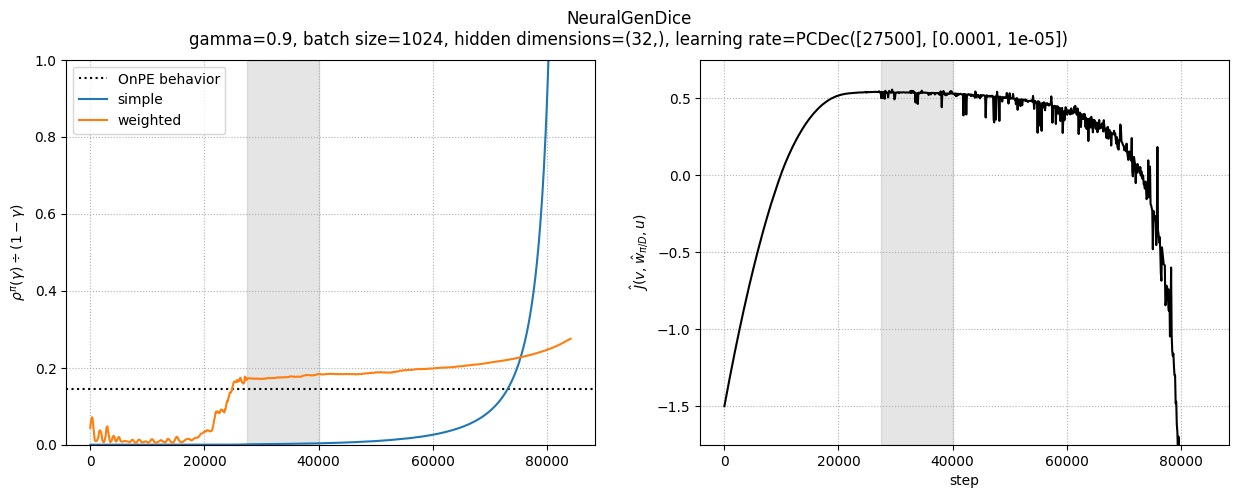

Getting log: data/medical_rl/outputs/split=(0.4, 0.1, 0.5)_seed=42/n_neurons=1024_learning_rate=0.0001_batch_size=512_gamma=0.99/n_pads=1/NeuralGradientDice/gam0.9_batchs1024_seed0_hdp(32,)_hdd(32,)_lrp0.001_lrd0.001_regp0.0_regd0.0_nlr0.001_nreg1.0/events.out.tfevents.1731107922.MacBook-Pro-von-Richard.local.91705.1.v2


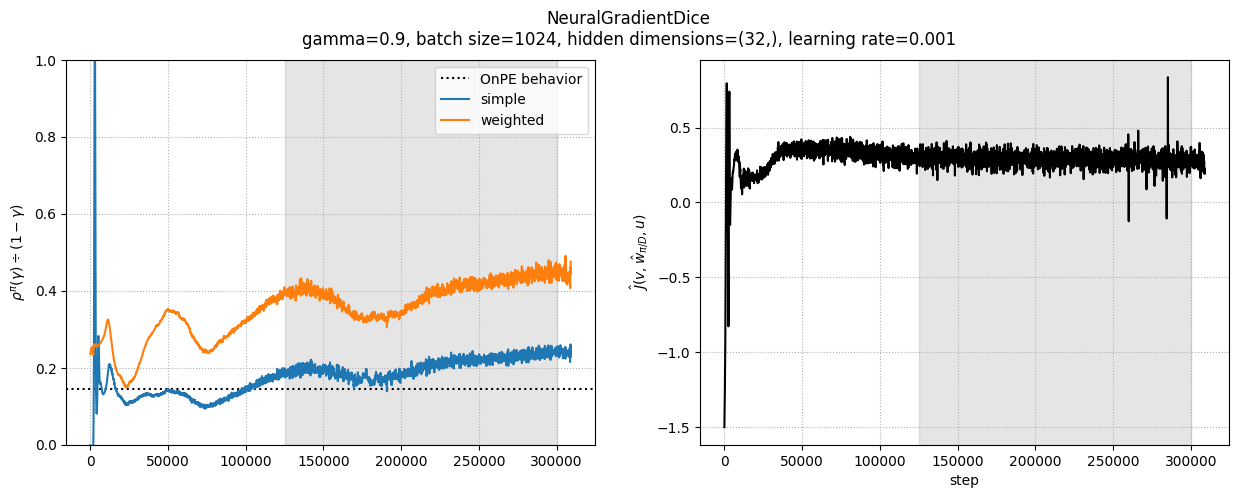

In [456]:
# plot_single("NeuralGenDice", 0.9, 1024, (32,), 1e-4, ylim1=(0, 1))
plot_single("NeuralGenDice", 0.9, 1024, (32,), "PCDec([27500], [0.0001, 1e-05])", ylim1=(0, 1), ylim2=(-1.75, 0.75), axvspan=(27_500, 40_000))
plot_single("NeuralGradientDice", 0.9, 1024, (32,), 1e-3, ylim1=(0, 1), axvspan=(125_000, 300_000))

Getting log: data/medical_rl/outputs/split=(0.4, 0.1, 0.5)_seed=42/n_neurons=1024_learning_rate=0.0001_batch_size=512_gamma=0.99/n_pads=1/NeuralGenDice/gam0.9_batchs1024_seed0_hdp(64,)_hdd(64,)_lrpPCDec([17500], [0.0001, 1e-05])_lrdPCDec([17500], [0.0001, 1e-05])_regp0.0_regd0.0_nlrPCDec([17500], [0.0001, 1e-05])_nreg1.0/events.out.tfevents.1731327942.MacBook-Pro-von-Richard.local.43891.1.v2


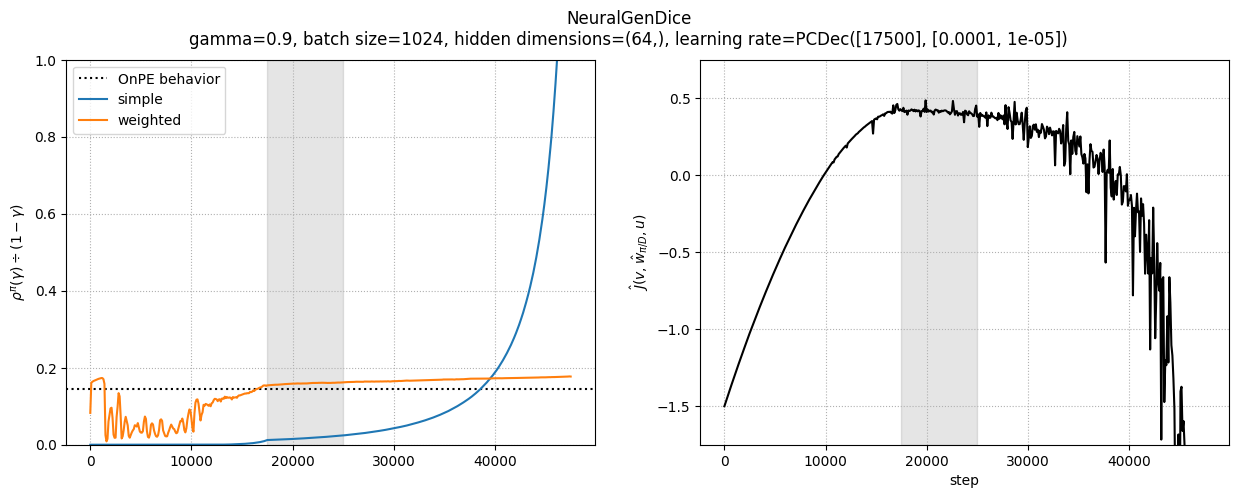

Getting log: data/medical_rl/outputs/split=(0.4, 0.1, 0.5)_seed=42/n_neurons=1024_learning_rate=0.0001_batch_size=512_gamma=0.99/n_pads=1/NeuralGradientDice/gam0.9_batchs1024_seed0_hdp(64,)_hdd(64,)_lrp0.001_lrd0.001_regp0.0_regd0.0_nlr0.001_nreg1.0/events.out.tfevents.1731242266.MacBook-Pro-von-Richard.local.25859.1.v2


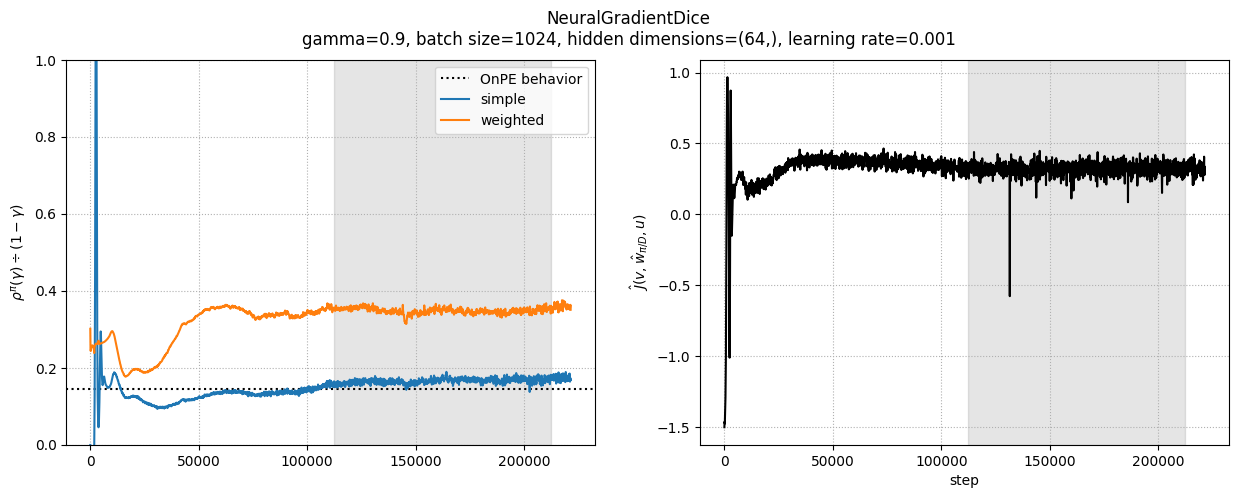

In [457]:
# plot_single("NeuralGenDice", 0.9, 1024, (64,), 1e-4, ylim1=(0, 1))
plot_single("NeuralGenDice", 0.9, 1024, (64,), "PCDec([17500], [0.0001, 1e-05])", ylim1=(0, 1), ylim2=(-1.75, 0.75), axvspan=(17_500, 25_000))
plot_single("NeuralGradientDice", 0.9, 1024, (64,), 1e-3, ylim1=(0, 1), axvspan=(112_500, 212_500))

Getting log: data/medical_rl/outputs/split=(0.4, 0.1, 0.5)_seed=42/n_neurons=1024_learning_rate=0.0001_batch_size=512_gamma=0.99/n_pads=1/NeuralGenDice/gam0.9_batchs1024_seed0_hdp(128,)_hdd(128,)_lrpPCDec([15000], [0.0001, 1e-05])_lrdPCDec([15000], [0.0001, 1e-05])_regp0.0_regd0.0_nlrPCDec([15000], [0.0001, 1e-05])_nreg1.0/events.out.tfevents.1731330999.MacBook-Pro-von-Richard.local.43891.2.v2


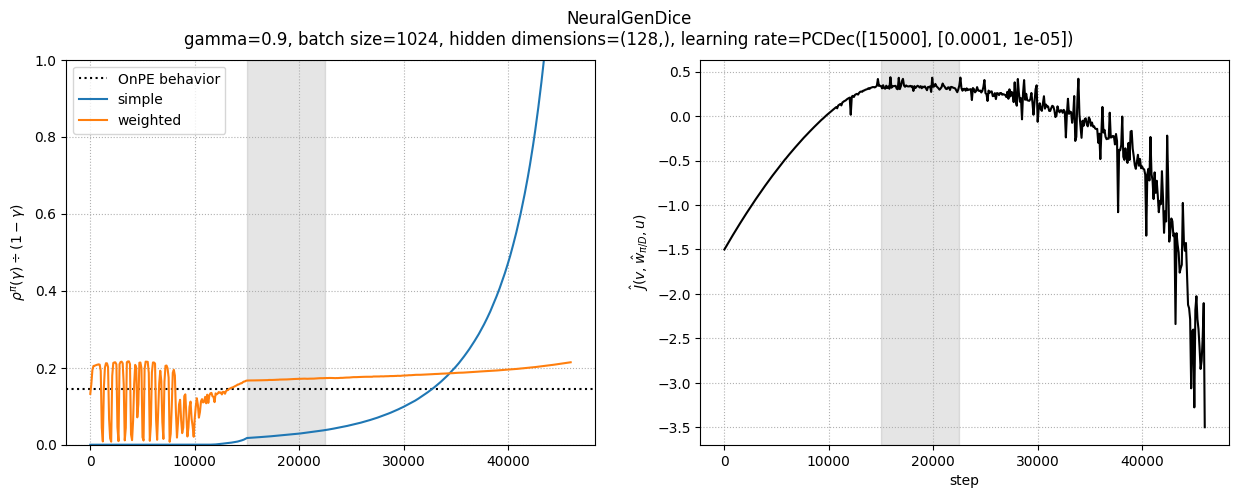

Getting log: data/medical_rl/outputs/split=(0.4, 0.1, 0.5)_seed=42/n_neurons=1024_learning_rate=0.0001_batch_size=512_gamma=0.99/n_pads=1/NeuralGradientDice/gam0.9_batchs1024_seed0_hdp(128,)_hdd(128,)_lrp0.001_lrd0.001_regp0.0_regd0.0_nlr0.001_nreg1.0/events.out.tfevents.1731081278.MacBook-Pro-von-Richard.local.78855.1.v2


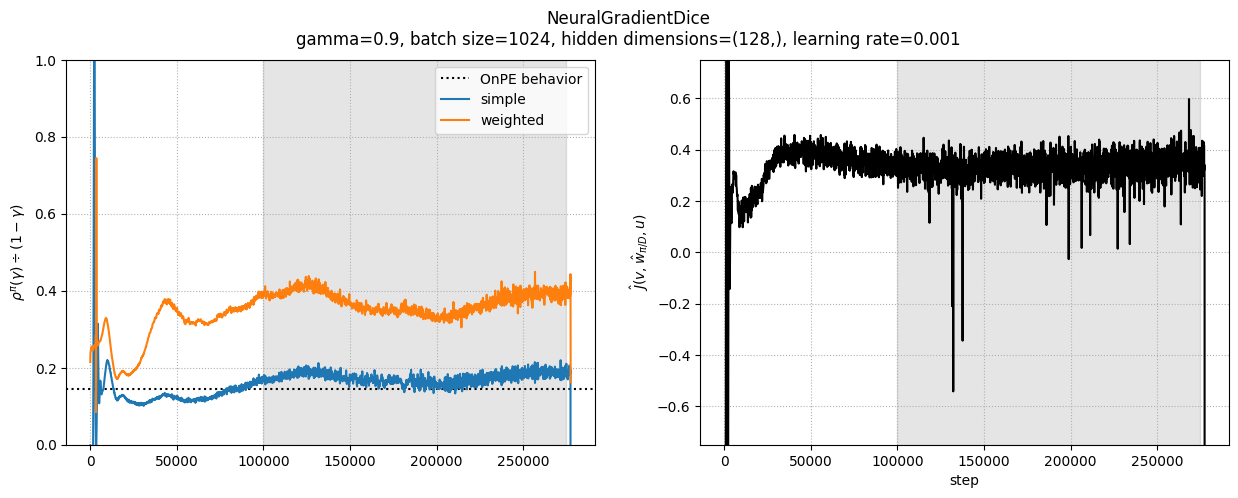

In [458]:
# plot_single("NeuralGenDice", 0.9, 1024, (128,), 1e-4, ylim1=(0, 1))
plot_single("NeuralGenDice", 0.9, 1024, (128,), "PCDec([15000], [0.0001, 1e-05])", ylim1=(0, 1), axvspan=(15_000, 22_500))
plot_single("NeuralGradientDice", 0.9, 1024, (128,), 1e-3, ylim1=(0, 1), ylim2=(-0.75, 0.75), axvspan=(100_000, 275_000))

Getting log: data/medical_rl/outputs/split=(0.4, 0.1, 0.5)_seed=42/n_neurons=1024_learning_rate=0.0001_batch_size=512_gamma=0.99/n_pads=1/NeuralGenDice/gam0.9_batchs1024_seed0_hdp(256,)_hdd(256,)_lrpPCDec([25000], [5e-05, 1e-05])_lrdPCDec([25000], [5e-05, 1e-05])_regp0.0_regd0.0_nlrPCDec([25000], [5e-05, 1e-05])_nreg1.0/events.out.tfevents.1731343059.MacBook-Pro-von-Richard.local.50374.0.v2


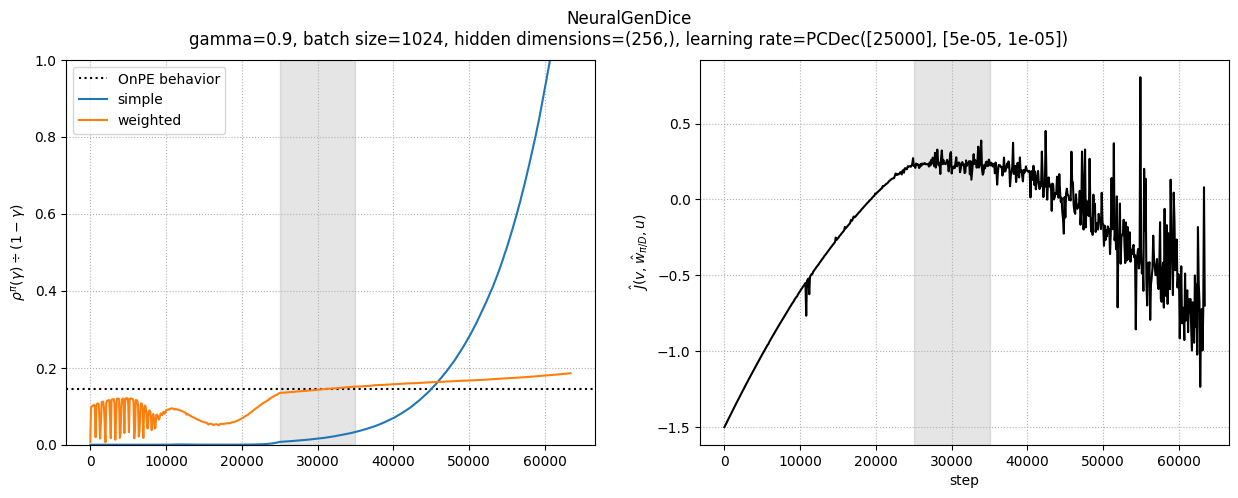

Getting log: data/medical_rl/outputs/split=(0.4, 0.1, 0.5)_seed=42/n_neurons=1024_learning_rate=0.0001_batch_size=512_gamma=0.99/n_pads=1/NeuralGradientDice/gam0.9_batchs1024_seed0_hdp(256,)_hdd(256,)_lrp0.001_lrd0.001_regp0.0_regd0.0_nlr0.001_nreg1.0/events.out.tfevents.1731144267.MacBook-Pro-von-Richard.local.96648.1.v2


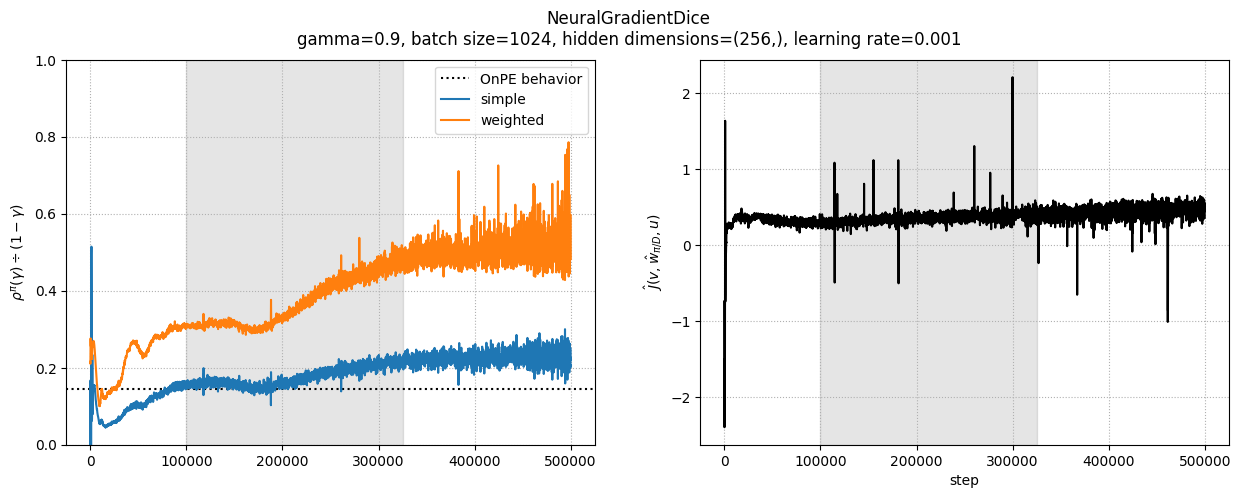

In [459]:
# plot_single("NeuralGenDice", 0.9, 1024, (256,), 1e-4, ylim1=(0, 1))
# plot_single("NeuralGenDice", 0.9, 1024, (256,), 5e-5, ylim1=(0, 1))
plot_single("NeuralGenDice", 0.9, 1024, (256,), "PCDec([25000], [5e-05, 1e-05])", ylim1=(0, 1), axvspan=(25_000, 35_000))
plot_single("NeuralGradientDice", 0.9, 1024, (256,), 1e-3, ylim1=(0, 1), axvspan=(100_000, 325_000))

In [ ]:
def get_stats():

    gam = 0.9
    batchs = 1024
    params = {
        (32, "Gen"): [ "PCDec([27500], [0.0001, 1e-05])", (27_500, 40_000), "w", ],
        (32, "Gradient"): [ 1e-3, (125_000, 300_000), "s", ],
        (64, "Gen"): [ "PCDec([17500], [0.0001, 1e-05])", (17_500, 25_000), "w", ],
        (64, "Gradient"): [ 1e-3, (112_500, 212_500), "s", ],
        (128, "Gen"): [ "PCDec([15000], [0.0001, 1e-05])", (15_000, 22_500), "w", ],
        (128, "Gradient"): [ 1e-3, (100_000, 275_000), "s", ],
        (256, "Gen"): [ "PCDec([25000], [5e-05, 1e-05])", (25_000, 35_000), "w", ],
        (256, "Gradient"): [ 1e-3, (100_000, 325_000), "s", ],
    }

    stats = {}

    for k, v in params.items():

        hd, alg = k
        lr, axvspan, ws = v

        algorithm = f"Neural{alg}Dice"

        log = get_logs(
            log_dir=os.path.join(
                outputs_dir, hparam_str_dataframe, hparam_str_policy, hparam_str_dataset,
                algorithm,
                f"gam{gam}_batchs{batchs}_seed0_hdp{hd,}_hdd{hd,}_lrp{lr}_lrd{lr}_regp0.0_regd0.0_nlr{lr}_nreg1.0",
            ),
        )

        x = np.array(log["data"][f"pv_{ws}"]["steps"])
        y = np.array(log["data"][f"pv_{ws}"]["values"])

        x_min, x_max = axvspan
        mask = (x_min <= x) * (x <= x_max)

        mean = np.mean(y[mask])
        std  = np.std (y[mask])

        stats[k] = mean, std

    return stats

stats = get_stats()

Getting log: data/medical_rl/outputs/split=(0.4, 0.1, 0.5)_seed=42/n_neurons=1024_learning_rate=0.0001_batch_size=512_gamma=0.99/n_pads=1/NeuralGenDice/gam0.9_batchs1024_seed0_hdp(32,)_hdd(32,)_lrpPCDec([27500], [0.0001, 1e-05])_lrdPCDec([27500], [0.0001, 1e-05])_regp0.0_regd0.0_nlrPCDec([27500], [0.0001, 1e-05])_nreg1.0/events.out.tfevents.1731323254.MacBook-Pro-von-Richard.local.43891.0.v2
Getting log: data/medical_rl/outputs/split=(0.4, 0.1, 0.5)_seed=42/n_neurons=1024_learning_rate=0.0001_batch_size=512_gamma=0.99/n_pads=1/NeuralGradientDice/gam0.9_batchs1024_seed0_hdp(32,)_hdd(32,)_lrp0.001_lrd0.001_regp0.0_regd0.0_nlr0.001_nreg1.0/events.out.tfevents.1731107922.MacBook-Pro-von-Richard.local.91705.1.v2
Getting log: data/medical_rl/outputs/split=(0.4, 0.1, 0.5)_seed=42/n_neurons=1024_learning_rate=0.0001_batch_size=512_gamma=0.99/n_pads=1/NeuralGenDice/gam0.9_batchs1024_seed0_hdp(64,)_hdd(64,)_lrpPCDec([17500], [0.0001, 1e-05])_lrdPCDec([17500], [0.0001, 1e-05])_regp0.0_regd0.0_nlr

In [410]:
stats

{(32, 'Gen'): (0.017553117747108143, 0.00034957449362660624),
 (32, 'Gradient'): (0.020368492731804307, 0.0023766183228890758),
 (64, 'Gen'): (0.015898345320142414, 0.00020887070149581006),
 (64, 'Gradient'): (0.016569239320000866, 0.0006950991658775742),
 (128, 'Gen'): (0.016969492389379365, 0.00019775231988750723),
 (128, 'Gradient'): (0.017435856878880874, 0.001401851705893068),
 (256, 'Gen'): (0.014271249653458004, 0.000489133722227738),
 (256, 'Gradient'): (0.017550055719150776, 0.002351057495283178)}

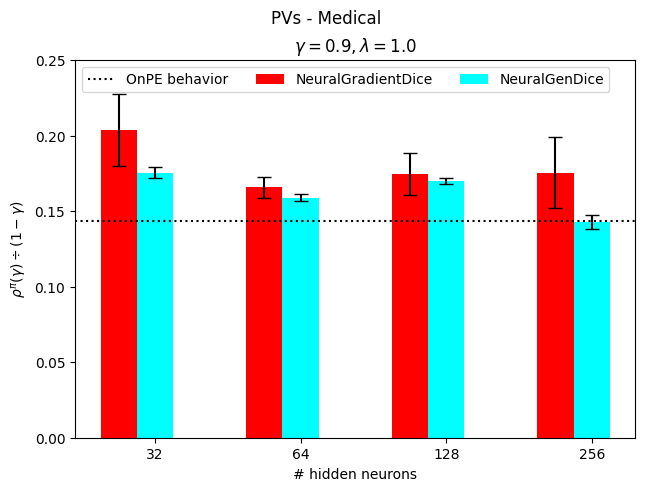

In [448]:
def group_barplot(
        group_names, grouped_values,
        title=None, suptitle=None, xlabel=None, ylabel=None, ylim=None,
        bar_width=0.25, bar_labels=False, bar_colors=None,
        legend_loc=None, figsize=None, capsize=None, baselines=None):

    # https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html

    plt.figure( layout="constrained", figsize=figsize, )

    x = np.arange( len(group_names) )

    for i, (attribute, measurement) in enumerate( grouped_values.items() ):
        yerr=None
        if capsize is not None:
            y    = [ m[0] for m in measurement ]
            yerr = [ m[1] for m in measurement ]

        label = attribute

        color = None
        if bar_colors is not None:
            color = bar_colors[i]

        offset = bar_width * i
        rects = plt.bar(x + offset, y, bar_width, yerr=yerr, capsize=capsize, label=label, color=color)
        if bar_labels: plt.bar_label(rects, padding=3)

    if baselines is not None:
        for label, y in baselines.items():
            plt.axhline(y, label=label, color="black", linestyle=":")

    plt.xticks(x + bar_width, group_names)
    plt.legend(loc=legend_loc, ncols=3)

    if suptitle is not None: plt.suptitle(suptitle)
    if title    is not None: plt.title(title)
    if ylabel   is not None: plt.ylabel(ylabel)
    if xlabel   is not None: plt.xlabel(xlabel)
    if ylim     is not None: plt.ylim(ylim)

    plt.show()

hidden_dimensions = [ 32, 64, 128, 256, ]
algorithms = ["Gradient", "Gen"]
gamma = 0.9

latex_gamma = r"\gamma"
latex_lambda = r"\lambda"

group_barplot(
    group_names=hidden_dimensions,
    grouped_values = {
        f"Neural{algorithm}Dice": [ np.array(stats[(hd, algorithm)]) / (1 - gamma) for hd in hidden_dimensions ]
            for algorithm in algorithms
    },
    suptitle="PVs - Medical",
    title=f"${latex_gamma}={gamma}, {latex_lambda}=1.0$",
    xlabel="# hidden neurons",
    ylabel=latex_labels["pv_scaled"](None),
    ylim=(None, 0.25),
    bar_width=0.25,
    bar_labels=False,
    bar_colors=["red", "cyan"],
    legend_loc="upper left",
    capsize=5,
    baselines={
        "OnPE behavior": get_behavior_policy_value(gamma) / (1 - gamma),
    }
)

Getting log: data/medical_rl/outputs/split=(0.4, 0.1, 0.5)_seed=42/n_neurons=1024_learning_rate=0.0001_batch_size=512_gamma=0.99/n_pads=1/NeuralGenDice/gam0.99_batchs1024_seed0_hdp(32,)_hdd(32,)_lrp0.0001_lrd0.0001_regp0.0_regd0.0_nlr0.0001_nreg1.0/events.out.tfevents.1731302234.MacBook-Pro-von-Richard.local.40805.0.v2


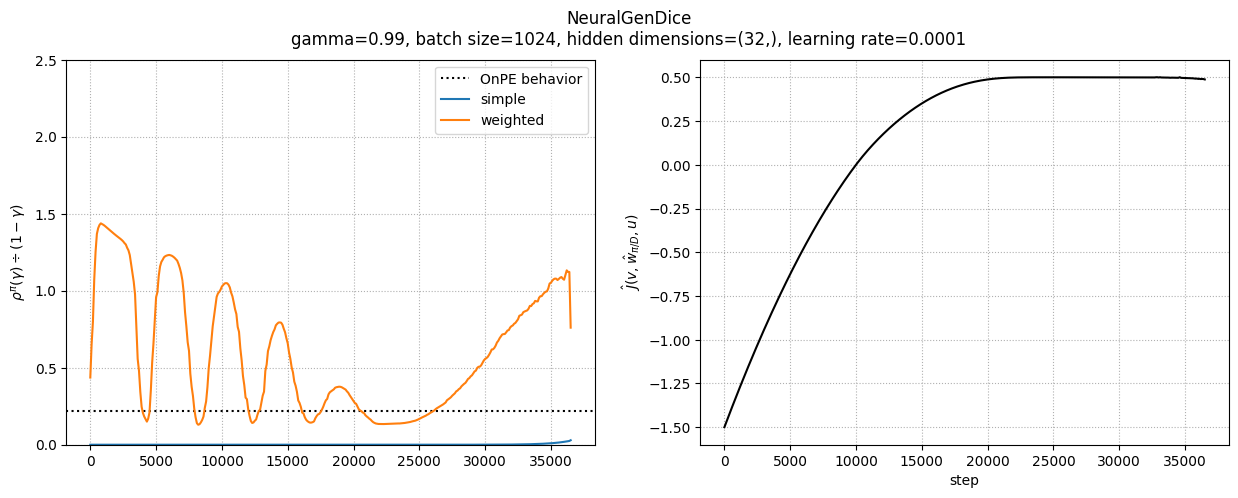

Getting log: data/medical_rl/outputs/split=(0.4, 0.1, 0.5)_seed=42/n_neurons=1024_learning_rate=0.0001_batch_size=512_gamma=0.99/n_pads=1/NeuralGradientDice/gam0.99_batchs1024_seed0_hdp(32,)_hdd(32,)_lrp0.001_lrd0.001_regp0.0_regd0.0_nlr0.001_nreg1.0/events.out.tfevents.1731304158.MacBook-Pro-von-Richard.local.40805.1.v2


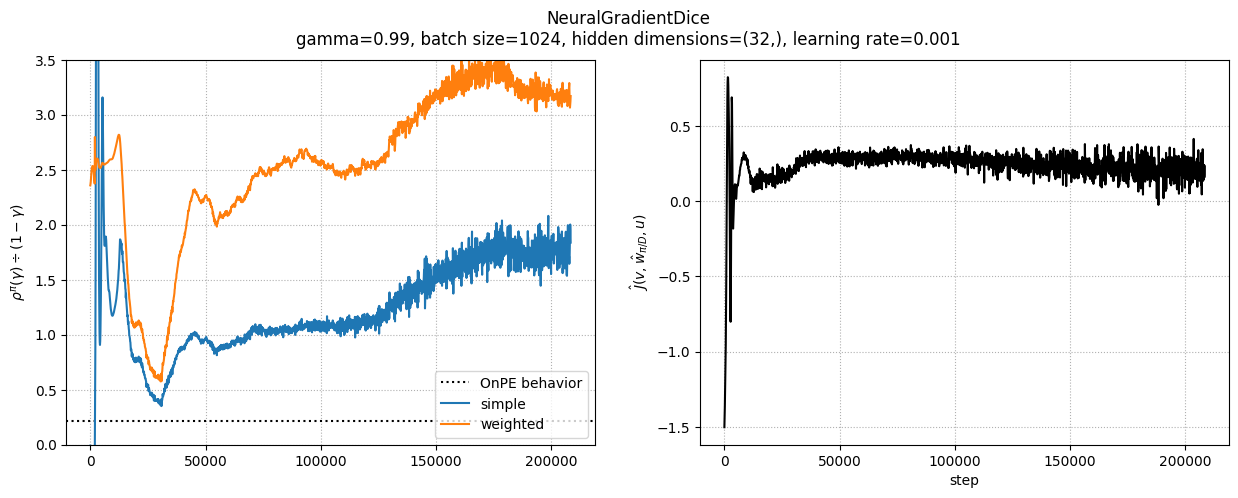

In [ ]:
plot_single("NeuralGenDice", 0.99, 1024, (32,), 1e-4, ylim1=(0, 2.5))
plot_single("NeuralGradientDice", 0.99, 1024, (32,), 1e-3, ylim1=(0, 3.5))

Getting log: data/medical_rl/outputs/split=(0.4, 0.1, 0.5)_seed=42/n_neurons=1024_learning_rate=0.0001_batch_size=512_gamma=0.99/n_pads=1/NeuralGenDice/gam0.99_batchs1024_seed0_hdp(64,)_hdd(64,)_lrp0.0001_lrd0.0001_regp0.0_regd0.0_nlr0.0001_nreg1.0/events.out.tfevents.1731261830.MacBook-Pro-von-Richard.local.35715.0.v2


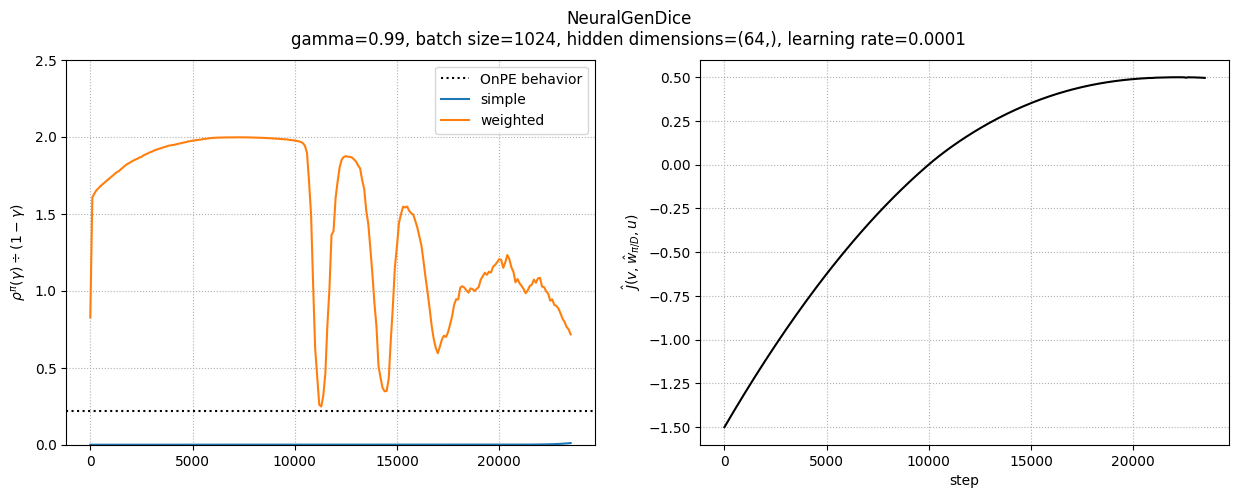

Getting log: data/medical_rl/outputs/split=(0.4, 0.1, 0.5)_seed=42/n_neurons=1024_learning_rate=0.0001_batch_size=512_gamma=0.99/n_pads=1/NeuralGradientDice/gam0.99_batchs1024_seed0_hdp(64,)_hdd(64,)_lrp0.001_lrd0.001_regp0.0_regd0.0_nlr0.001_nreg1.0/events.out.tfevents.1731263244.MacBook-Pro-von-Richard.local.35715.1.v2


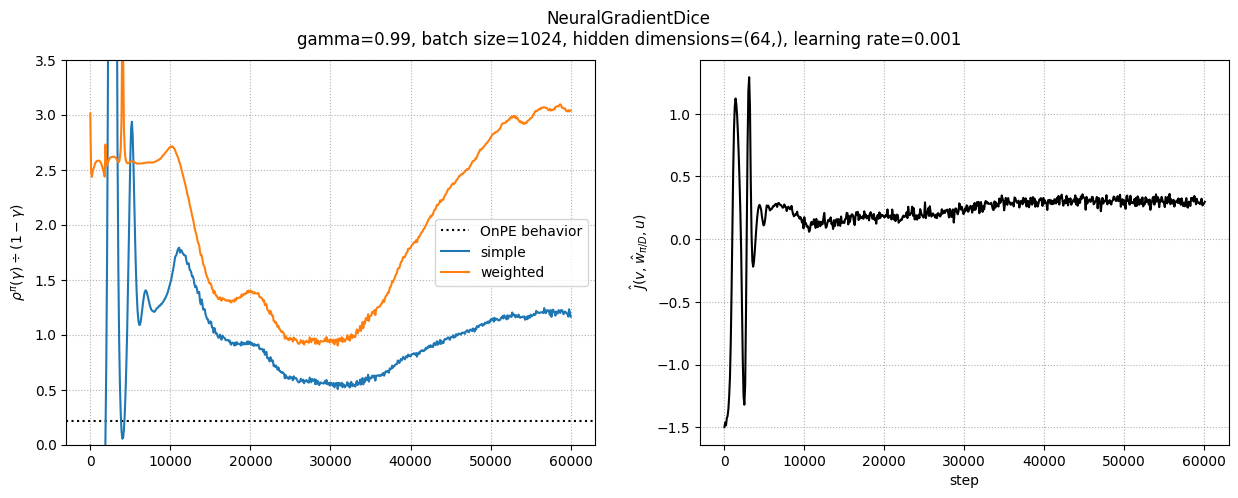

In [ ]:
plot_single("NeuralGenDice", 0.99, 1024, (64,), 1e-4, ylim1=(0, 2.5))
plot_single("NeuralGradientDice", 0.99, 1024, (64,), 1e-3, ylim1=(0, 3.5))

Getting log: data/medical_rl/outputs/split=(0.4, 0.1, 0.5)_seed=42/n_neurons=1024_learning_rate=0.0001_batch_size=512_gamma=0.99/n_pads=1/NeuralGenDice/gam0.99_batchs1024_seed0_hdp(128,)_hdd(128,)_lrp0.0001_lrd0.0001_regp0.0_regd0.0_nlr0.0001_nreg1.0/events.out.tfevents.1731063194.MacBook-Pro-von-Richard.local.70033.0.v2


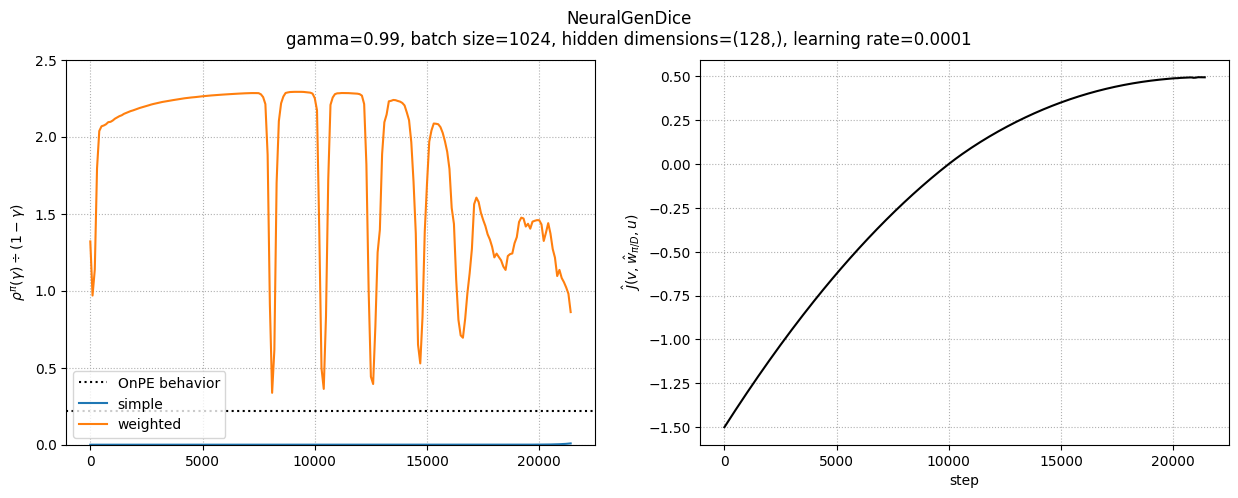

Getting log: data/medical_rl/outputs/split=(0.4, 0.1, 0.5)_seed=42/n_neurons=1024_learning_rate=0.0001_batch_size=512_gamma=0.99/n_pads=1/NeuralGradientDice/gam0.99_batchs1024_seed0_hdp(128,)_hdd(128,)_lrp0.001_lrd0.001_regp0.0_regd0.0_nlr0.001_nreg1.0/events.out.tfevents.1731064780.MacBook-Pro-von-Richard.local.70033.1.v2


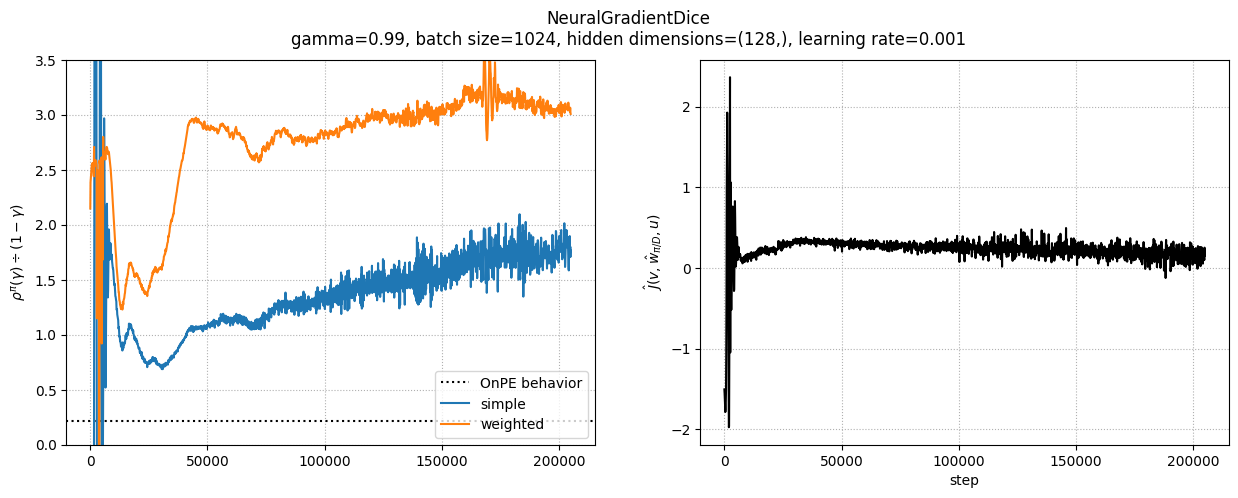

In [ ]:
plot_single("NeuralGenDice", 0.99, 1024, (128,), 1e-4, ylim1=(0, 2.5))
plot_single("NeuralGradientDice", 0.99, 1024, (128,), 1e-3, ylim1=(0, 3.5))

Getting log: data/medical_rl/outputs/split=(0.4, 0.1, 0.5)_seed=42/n_neurons=1024_learning_rate=0.0001_batch_size=512_gamma=0.99/n_pads=1/NeuralGenDice/gam0.99_batchs1024_seed0_hdp(256,)_hdd(256,)_lrp0.0001_lrd0.0001_regp0.0_regd0.0_nlr0.0001_nreg1.0/events.out.tfevents.1731216812.MacBook-Pro-von-Richard.local.15096.0.v2


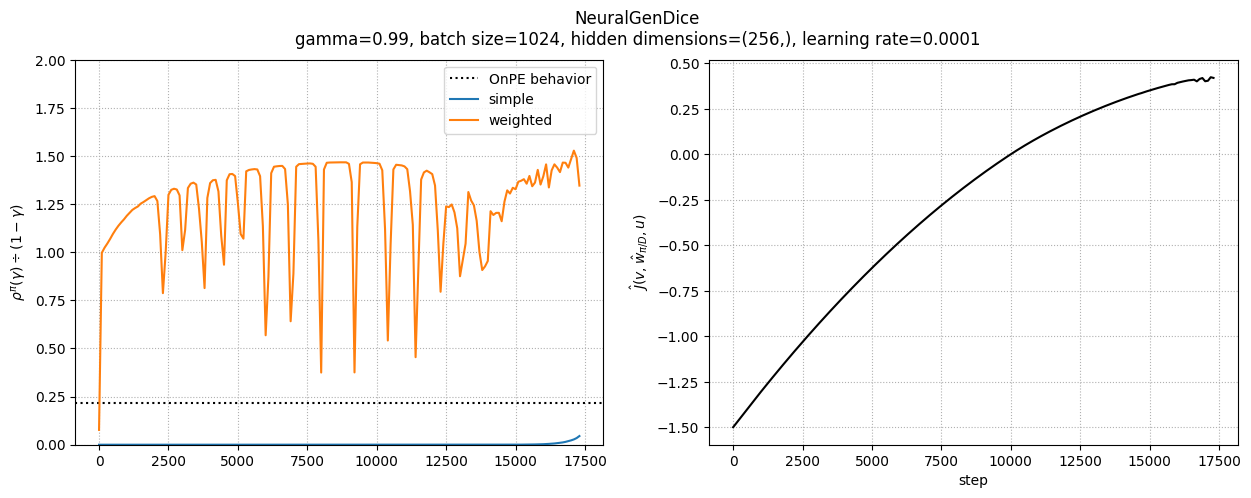

Getting log: data/medical_rl/outputs/split=(0.4, 0.1, 0.5)_seed=42/n_neurons=1024_learning_rate=0.0001_batch_size=512_gamma=0.99/n_pads=1/NeuralGradientDice/gam0.99_batchs1024_seed0_hdp(256,)_hdd(256,)_lrp0.001_lrd0.001_regp0.0_regd0.0_nlr0.001_nreg1.0/events.out.tfevents.1731218364.MacBook-Pro-von-Richard.local.15096.1.v2


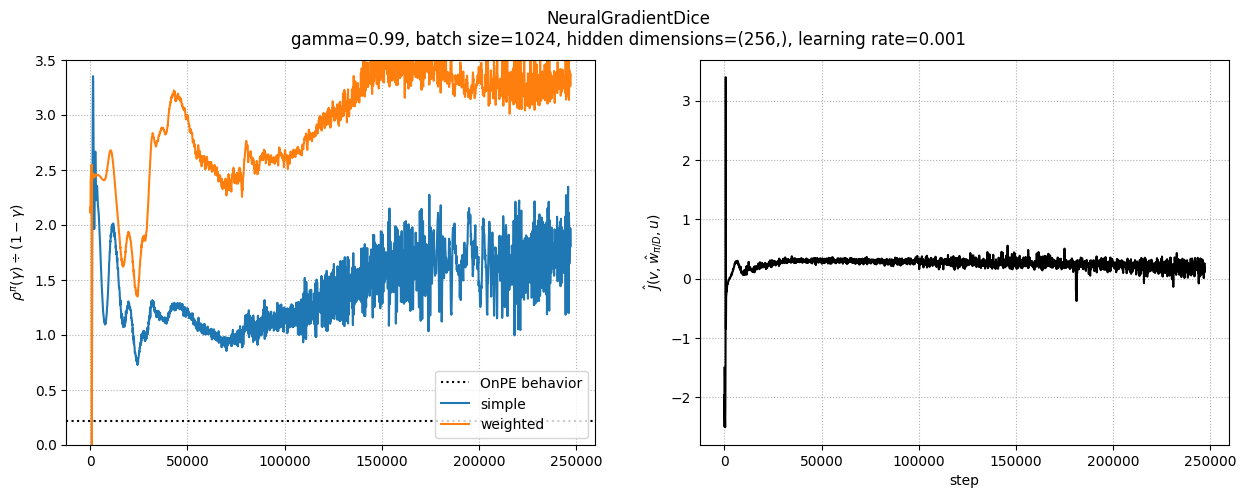

In [ ]:
plot_single("NeuralGenDice", 0.99, 1024, (256,), 1e-4, ylim1=(0, 2))
plot_single("NeuralGradientDice", 0.99, 1024, (256,), 1e-3, ylim1=(0, 3.5))

### Redundant

Getting log: data/medical_rl/outputs/split=(0.4, 0.1, 0.5)_seed=42/n_neurons=1024_learning_rate=0.0001_batch_size=512_gamma=0.99/n_pads=1/NeuralGenDice/gam0.9_batchs2048_seed0_hdp(256,)_hdd(256,)_lrp0.0001_lrd0.0001_regp0.0_regd0.0_nlr0.0001_nreg1.0/events.out.tfevents.1731190745.MacBook-Pro-von-Richard.local.10482.0.v2


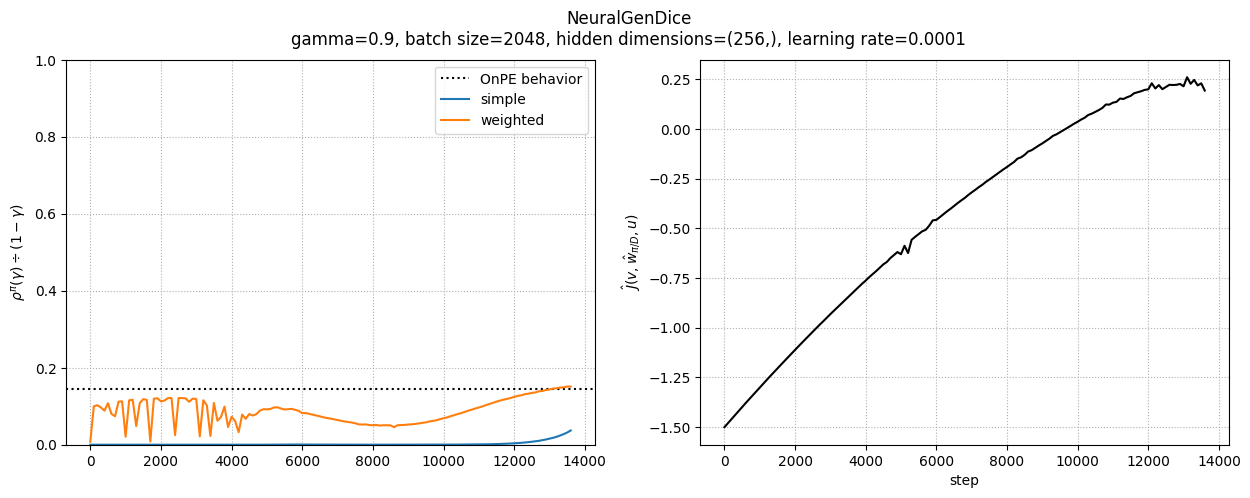

Getting log: data/medical_rl/outputs/split=(0.4, 0.1, 0.5)_seed=42/n_neurons=1024_learning_rate=0.0001_batch_size=512_gamma=0.99/n_pads=1/NeuralGradientDice/gam0.9_batchs2048_seed0_hdp(256,)_hdd(256,)_lrp0.001_lrd0.001_regp0.0_regd0.0_nlr0.001_nreg1.0/events.out.tfevents.1731192670.MacBook-Pro-von-Richard.local.10482.1.v2


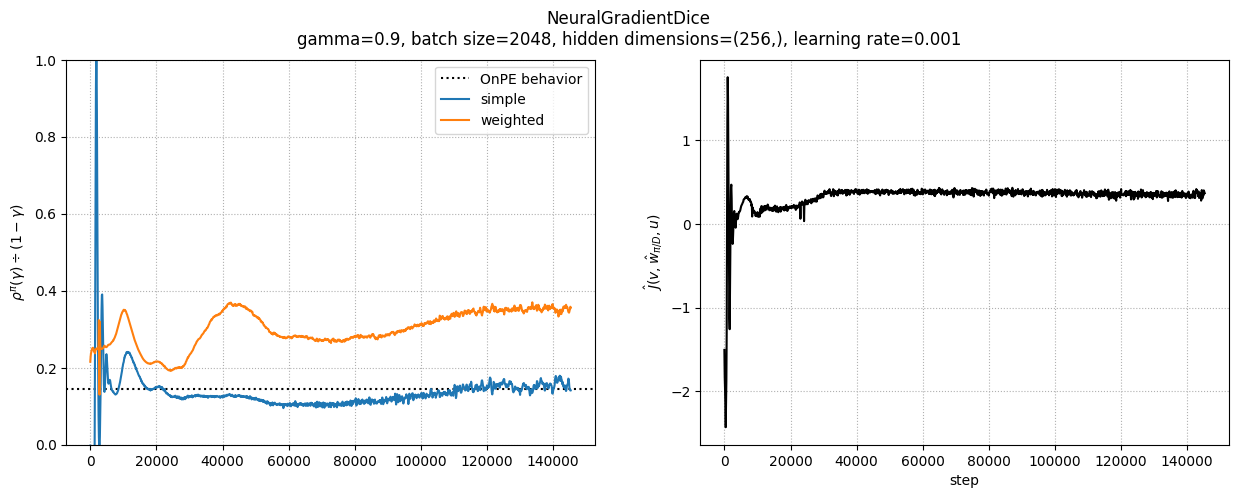

In [ ]:
plot_single("NeuralGenDice", 0.9, 2048, (256,), 1e-4, ylim=(0, 1))
plot_single("NeuralGradientDice", 0.9, 2048, (256,), 1e-3, ylim=(0, 1)) # higher batch size makes things less stable

### Deprecated

Getting log: data/medical_rl/outputs/split=(0.4, 0.1, 0.5)_seed=42/n_neurons=1024_learning_rate=0.0001_batch_size=512_gamma=0.99/n_pads=1/NeuralGenDice/gam0.99_nstep750000_batchs1024_seed0_hdp(128,)_hdd(128,)_lrp0.0001_lrd0.0001_regp0.0_regd0.0_nlr0.0001_nreg1.0/events.out.tfevents.1730887673.MacBook-Pro-von-Richard.local.10526.0.v2


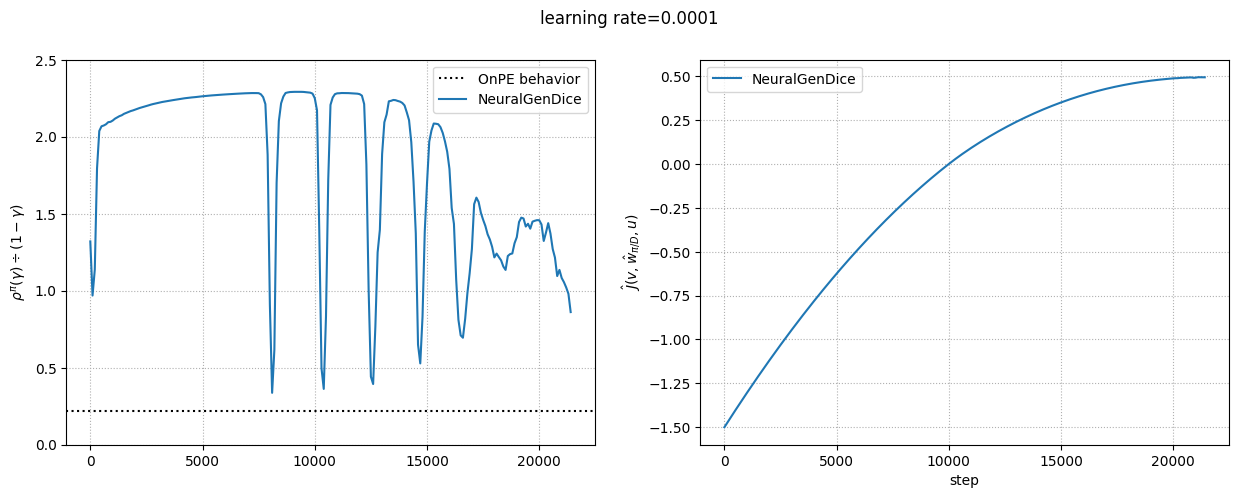

Getting log: data/medical_rl/outputs/split=(0.4, 0.1, 0.5)_seed=42/n_neurons=1024_learning_rate=0.0001_batch_size=512_gamma=0.99/n_pads=1/NeuralGenDice/gam0.99_nstep750000_batchs1024_seed0_hdp(128,)_hdd(128,)_lrp5e-05_lrd5e-05_regp0.0_regd0.0_nlr5e-05_nreg1.0/events.out.tfevents.1730669315.MacBook-Pro-von-Richard.local.90975.0.v2


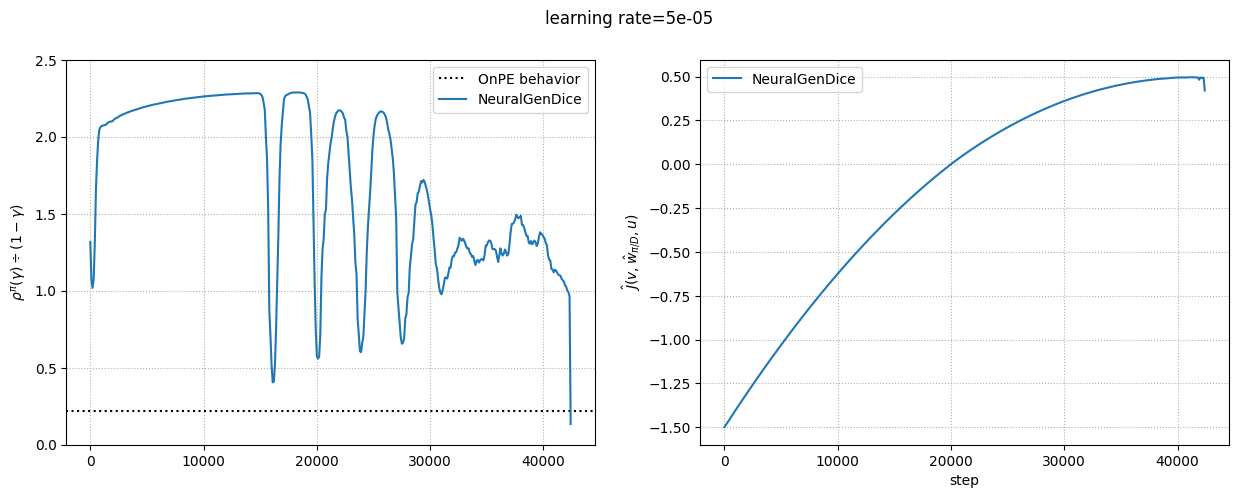

Getting log: data/medical_rl/outputs/split=(0.4, 0.1, 0.5)_seed=42/n_neurons=1024_learning_rate=0.0001_batch_size=512_gamma=0.99/n_pads=1/NeuralGenDice/gam0.99_nstep750000_batchs1024_seed0_hdp(128,)_hdd(128,)_lrp1e-05_lrd1e-05_regp0.0_regd0.0_nlr1e-05_nreg1.0/events.out.tfevents.1730672361.MacBook-Pro-von-Richard.local.90975.1.v2


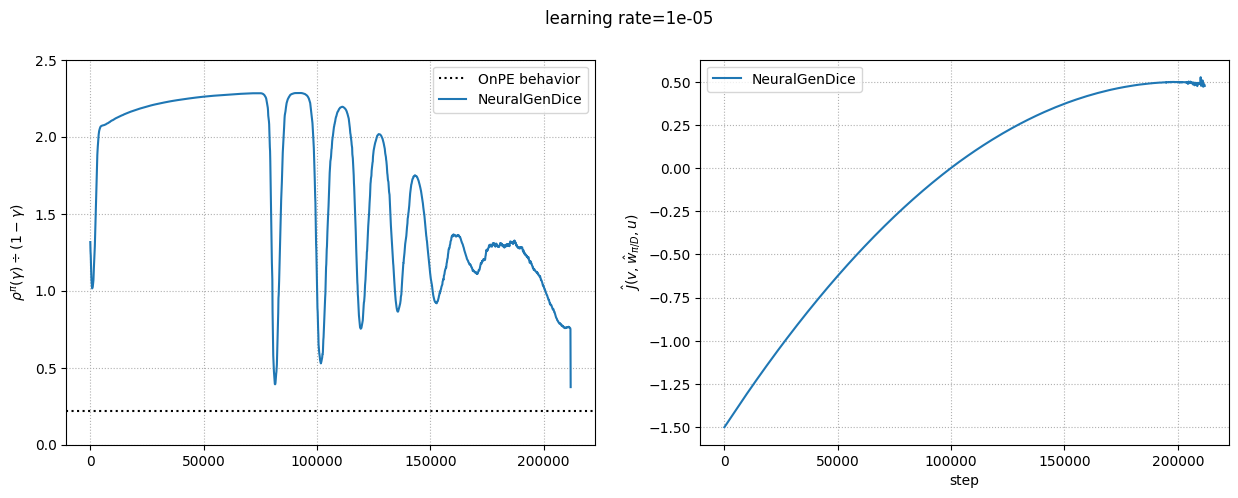

Getting log: data/medical_rl/outputs/split=(0.4, 0.1, 0.5)_seed=42/n_neurons=1024_learning_rate=0.0001_batch_size=512_gamma=0.99/n_pads=1/NeuralGenDice/gam0.99_nstep750000_batchs1024_seed0_hdp(128,)_hdd(128,)_lrp5e-06_lrd5e-06_regp0.0_regd0.0_nlr5e-06_nreg1.0/events.out.tfevents.1730711089.MacBook-Pro-von-Richard.local.96863.0.v2


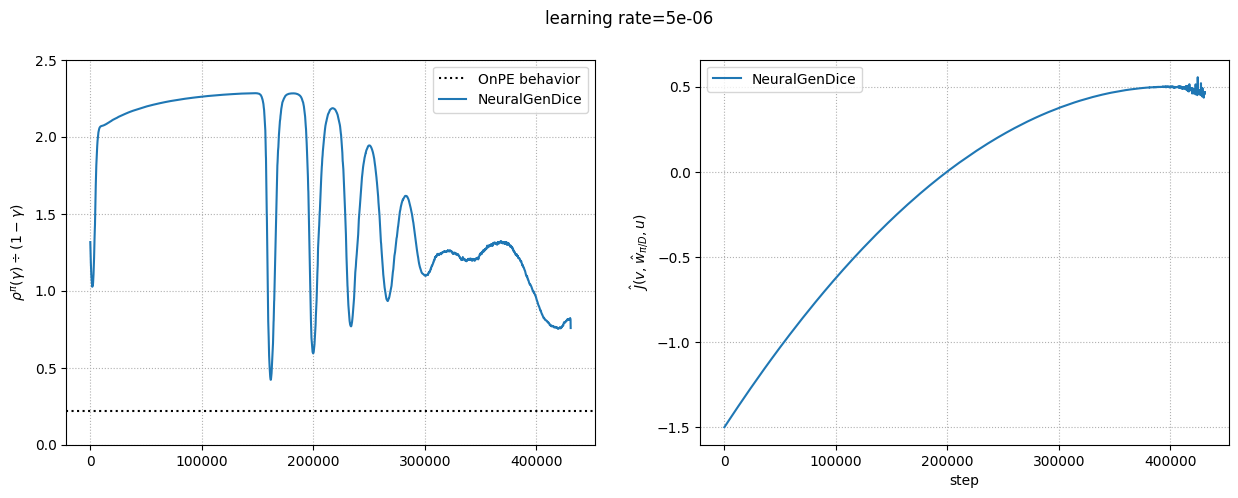

Getting log: data/medical_rl/outputs/split=(0.4, 0.1, 0.5)_seed=42/n_neurons=1024_learning_rate=0.0001_batch_size=512_gamma=0.99/n_pads=1/NeuralGenDice/gam0.99_nstep750000_batchs1024_seed0_hdp(128,)_hdd(128,)_lrp1e-06_lrd1e-06_regp0.0_regd0.0_nlr1e-06_nreg1.0/events.out.tfevents.1730748605.eduroam-078-104-012-045.wlan.univie.ac.at.96863.1.v2


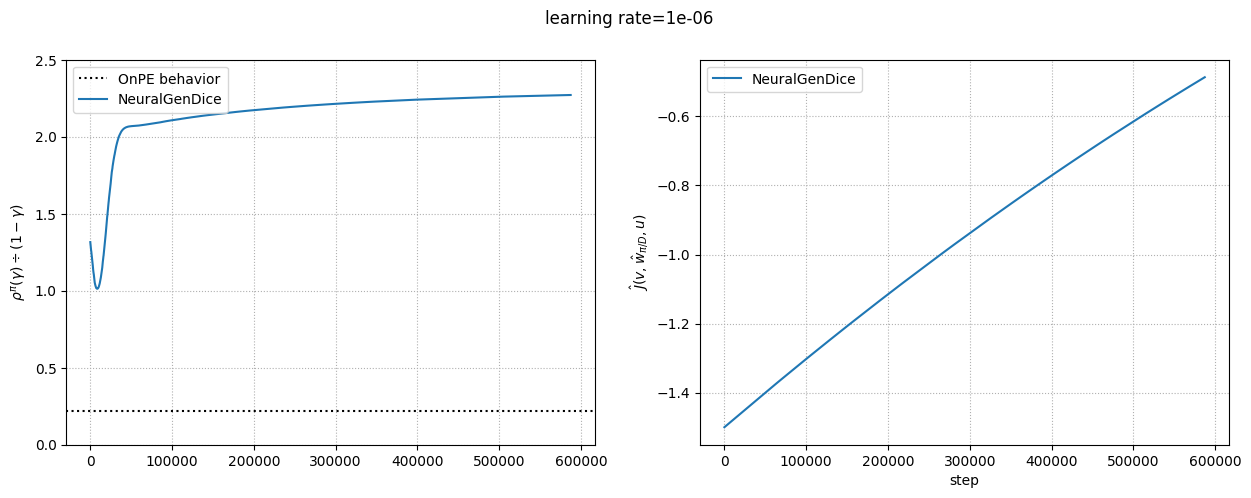

In [ ]:
bad  = [1e-0, 1e-1, 1e-2, 1e-3, 5e-4]
good = [1e-4, 5e-5, 1e-5, 5e-6, 1e-6]

for lr in good:
    plot_single("NeuralGenDice", 0.99, (128,), lr, ylim=(0, 2.5))

Getting log: data/medical_rl/outputs/split=(0.4, 0.1, 0.5)_seed=42/n_neurons=1024_learning_rate=0.0001_batch_size=512_gamma=0.99/n_pads=1/NeuralGradientDice/gam0.99_nstep750000_batchs1024_seed0_hdp(128,)_hdd(128,)_lrp0.001_lrd0.001_regp0.0_regd0.0_nlr0.001_nreg1.0/events.out.tfevents.1730889645.MacBook-Pro-von-Richard.local.11444.7.v2


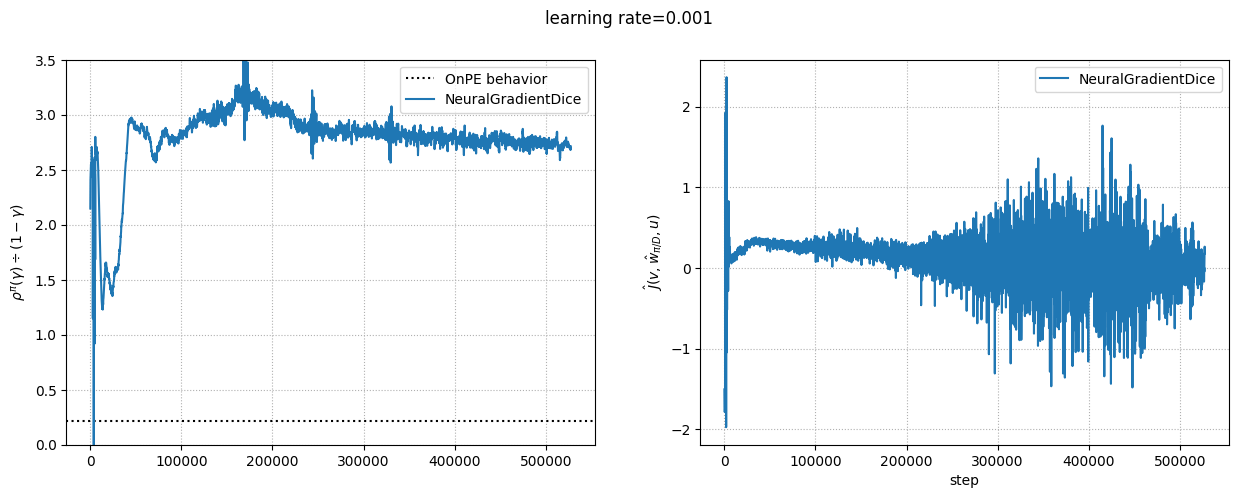

Getting log: data/medical_rl/outputs/split=(0.4, 0.1, 0.5)_seed=42/n_neurons=1024_learning_rate=0.0001_batch_size=512_gamma=0.99/n_pads=1/NeuralGradientDice/gam0.99_nstep750000_batchs1024_seed0_hdp(128,)_hdd(128,)_lrp0.0001_lrd0.0001_regp0.0_regd0.0_nlr0.0001_nreg1.0/events.out.tfevents.1730860129.MacBook-Pro-von-Richard.local.3504.2.v2


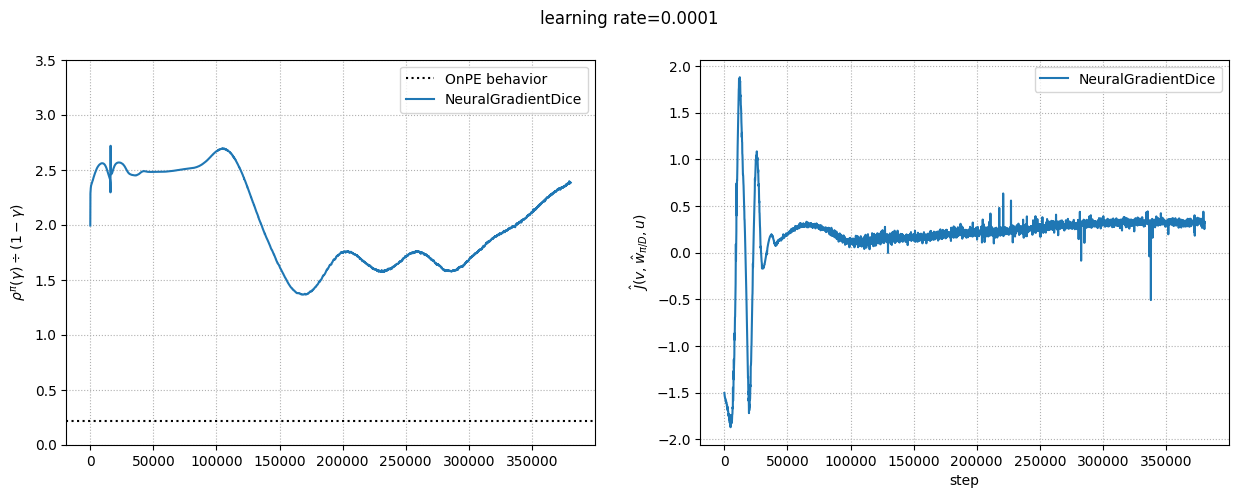

Getting log: data/medical_rl/outputs/split=(0.4, 0.1, 0.5)_seed=42/n_neurons=1024_learning_rate=0.0001_batch_size=512_gamma=0.99/n_pads=1/NeuralGradientDice/gam0.99_nstep750000_batchs1024_seed0_hdp(128,)_hdd(128,)_lrp5e-05_lrd5e-05_regp0.0_regd0.0_nlr5e-05_nreg1.0/events.out.tfevents.1730503381.MacBook-Pro-von-Richard.local.55499.0.v2


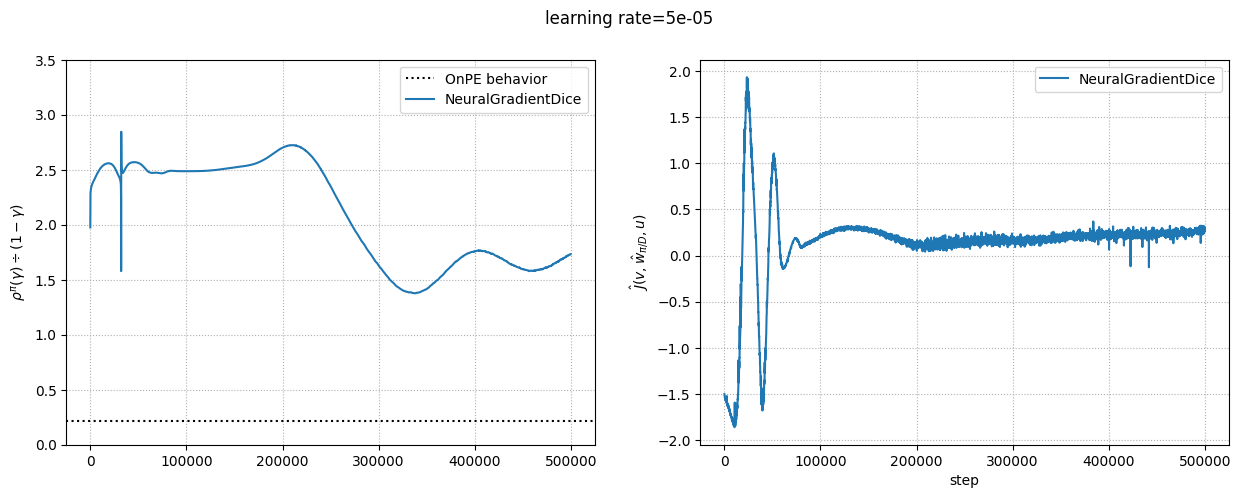

In [ ]:
bad  = [1e-0, 1e-1, 1e-2]
good = [1e-3, 1e-4, 5e-5]

for lr in good:
    plot_single("NeuralGradientDice", 0.99, (128,), lr, ylim=(0, 3.5))

Getting log: data/medical_rl/outputs/split=(0.4, 0.1, 0.5)_seed=42/n_neurons=1024_learning_rate=0.0001_batch_size=512_gamma=0.99/n_pads=1/NeuralGenDice/gam0.99_nstep750000_batchs1024_seed0_hdp(128,)_hdd(128,)_lrp0.0001_lrd0.0001_regp0.0_regd0.0_nlr0.0001_nreg1.0/events.out.tfevents.1730887673.MacBook-Pro-von-Richard.local.10526.0.v2


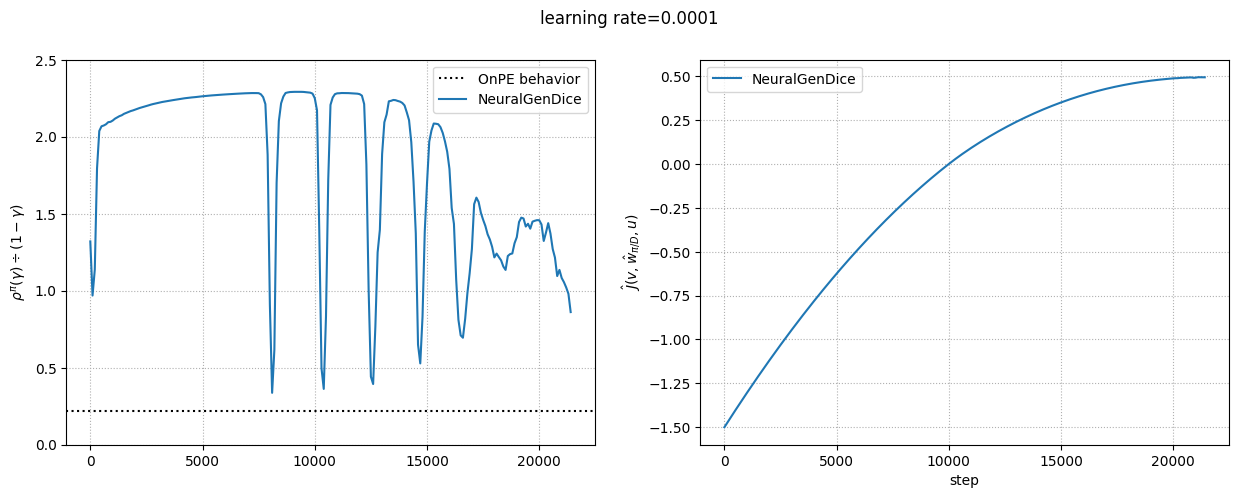

Getting log: data/medical_rl/outputs/split=(0.4, 0.1, 0.5)_seed=42/n_neurons=1024_learning_rate=0.0001_batch_size=512_gamma=0.99/n_pads=1/NeuralGradientDice/gam0.99_nstep750000_batchs1024_seed0_hdp(128,)_hdd(128,)_lrp0.001_lrd0.001_regp0.0_regd0.0_nlr0.001_nreg1.0/events.out.tfevents.1730889645.MacBook-Pro-von-Richard.local.11444.7.v2


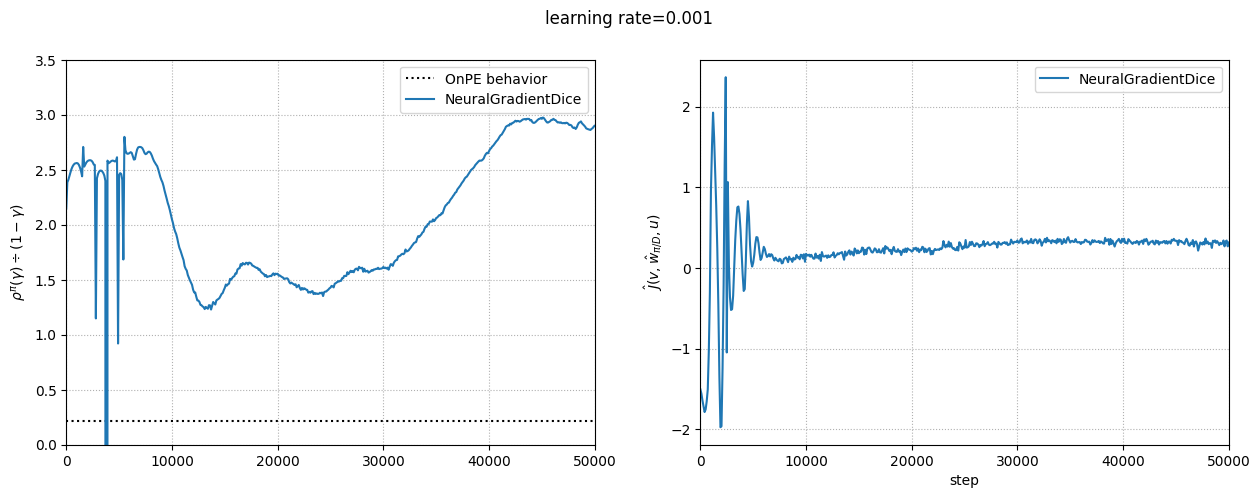

In [ ]:
plot_single("NeuralGenDice", 0.99, (128,), 1e-4, ylim=(0, 2.5))
plot_single("NeuralGradientDice", 0.99, (128,), 1e-3, ylim=(0, 3.5), xlim=(0, 50_000))

Getting log: data/medical_rl/outputs/split=(0.4, 0.1, 0.5)_seed=42/n_neurons=1024_learning_rate=0.0001_batch_size=512_gamma=0.99/n_pads=1/NeuralGenDice/gam0.99_nstep750000_batchs1024_seed0_hdp(128,)_hdd(128,)_lrpPCDec([20000], [0.0001, 1e-06])_lrdPCDec([20000], [0.0001, 1e-06])_regp0.0_regd0.0_nlrPCDec([20000], [0.0001, 1e-06])_nreg1.0/events.out.tfevents.1730984593.MacBook-Pro-von-Richard.local.52646.0.v2


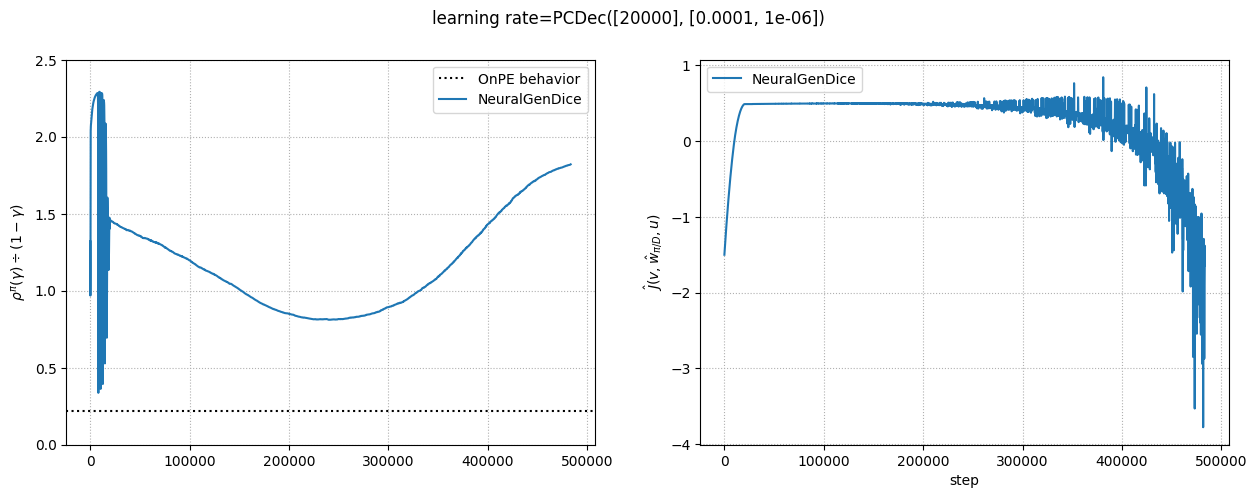

Getting log: data/medical_rl/outputs/split=(0.4, 0.1, 0.5)_seed=42/n_neurons=1024_learning_rate=0.0001_batch_size=512_gamma=0.99/n_pads=1/NeuralGenDice/gam0.99_nstep750000_batchs1024_seed0_hdp(128,)_hdd(128,)_lrpPCDec([20000], [0.0001, 5e-06])_lrdPCDec([20000], [0.0001, 5e-06])_regp0.0_regd0.0_nlrPCDec([20000], [0.0001, 5e-06])_nreg1.0/events.out.tfevents.1731060930.MacBook-Pro-von-Richard.local.67462.1.v2


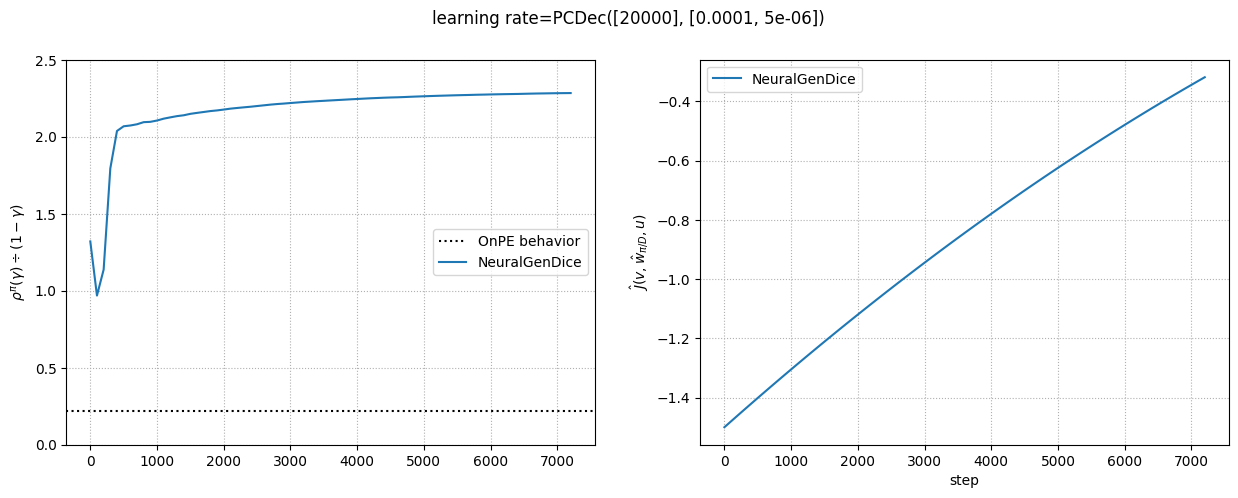

Getting log: data/medical_rl/outputs/split=(0.4, 0.1, 0.5)_seed=42/n_neurons=1024_learning_rate=0.0001_batch_size=512_gamma=0.99/n_pads=1/NeuralGenDice/gam0.99_nstep750000_batchs1024_seed0_hdp(128,)_hdd(128,)_lrpPCDec([20000], [0.0001, 1e-05])_lrdPCDec([20000], [0.0001, 1e-05])_regp0.0_regd0.0_nlrPCDec([20000], [0.0001, 1e-05])_nreg1.0/events.out.tfevents.1731057699.MacBook-Pro-von-Richard.local.67462.0.v2


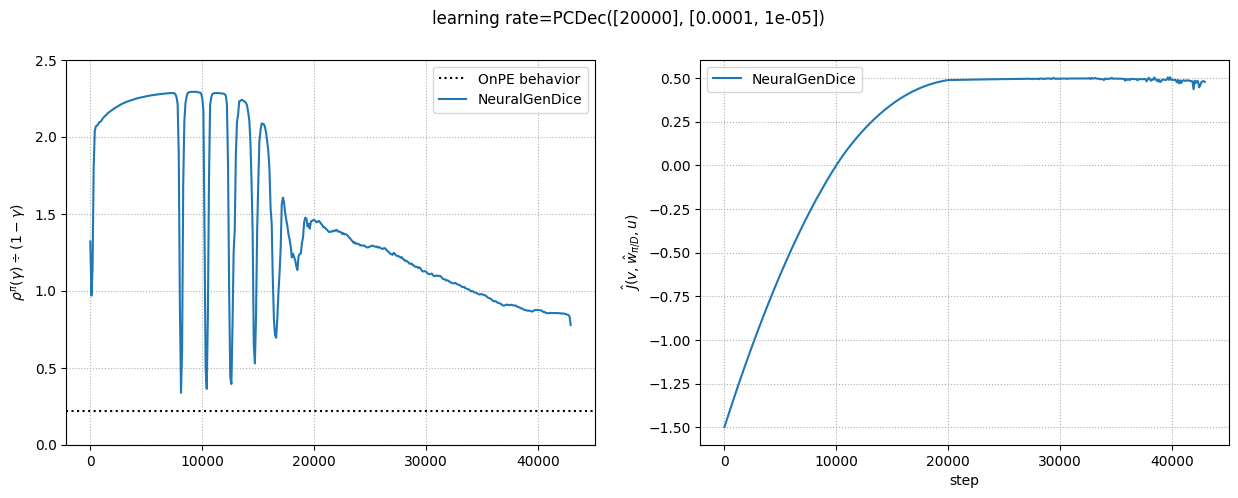

In [ ]:
plot_single("NeuralGenDice", "PCDec([20000], [0.0001, 1e-06])", 0.99, (128,), ylim=(0, 2.5))
plot_single("NeuralGenDice", "PCDec([20000], [0.0001, 1e-05])", 0.99, (128,), ylim=(0, 2.5))

Getting log: data/medical_rl/outputs/split=(0.4, 0.1, 0.5)_seed=42/n_neurons=1024_learning_rate=0.0001_batch_size=512_gamma=0.99/n_pads=1/NeuralGradientDice/gam0.99_nstep750000_batchs1024_seed0_hdp(128,)_hdd(128,)_lrpPCDec([25000], [0.001, 5e-05])_lrdPCDec([25000], [0.001, 5e-05])_regp0.0_regd0.0_nlrPCDec([25000], [0.001, 5e-05])_nreg1.0/events.out.tfevents.1731020330.MacBook-Pro-von-Richard.local.60962.0.v2


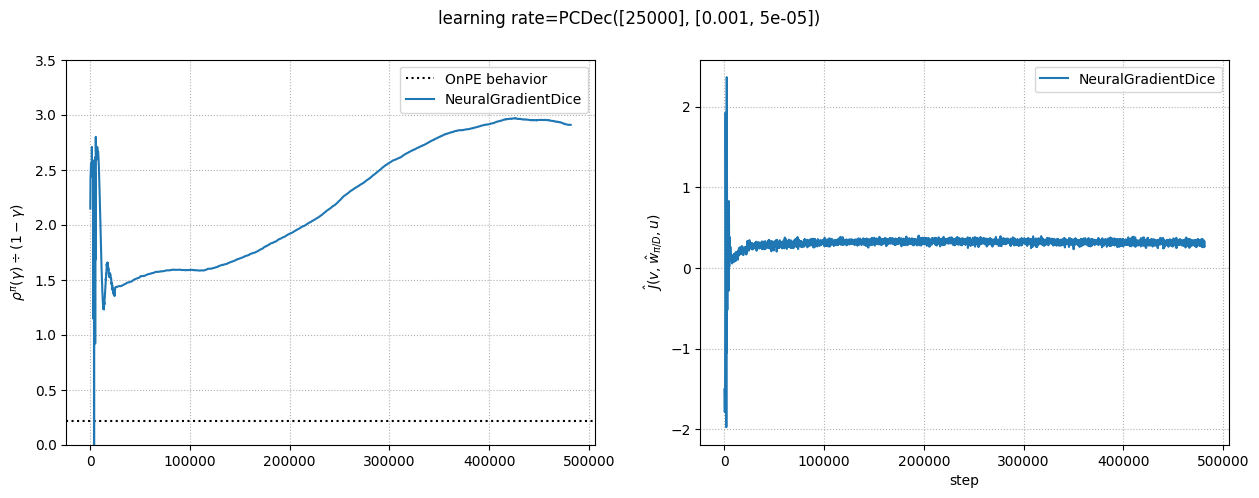

In [ ]:
plot_single("NeuralGradientDice", "PCDec([25000], [0.001, 5e-05])", 0.99, (128,), ylim=(0, 3.5))

## Final

In [184]:
seeds = [0, 1, 2, 3]
algorithms = ["NeuralGradientDice"]

hparam_str_evaluation = {
    "NeuralGradientDice": {
        seed: f"gam0.99_nstep750000_batchs1024_seed{seed}_hdp(128,)_hdd(128,)_lrp5e-05_lrd5e-05_regp0.0_regd0.0_nlr5e-05_nreg1.0"
            for seed in seeds
    }
}

logs = {
    algorithm: {
        seed: get_logs(
            log_dir=os.path.join(
                outputs_dir, hparam_str_dataframe, hparam_str_policy, hparam_str_dataset,
                algorithm,
                hparam_str_evaluation[algorithm][seed],
            ),
        )
            for seed in seeds
    }
        for algorithm in algorithms
}

Getting log: data/medical_rl/outputs/split=(0.4, 0.1, 0.5)_seed=42/n_neurons=1024_learning_rate=0.0001_batch_size=512_gamma=0.99/n_pads=1/NeuralGradientDice/gam0.99_nstep750000_batchs1024_seed0_hdp(128,)_hdd(128,)_lrp5e-05_lrd5e-05_regp0.0_regd0.0_nlr5e-05_nreg1.0/events.out.tfevents.1730503381.MacBook-Pro-von-Richard.local.55499.0.v2
Getting log: data/medical_rl/outputs/split=(0.4, 0.1, 0.5)_seed=42/n_neurons=1024_learning_rate=0.0001_batch_size=512_gamma=0.99/n_pads=1/NeuralGradientDice/gam0.99_nstep750000_batchs1024_seed1_hdp(128,)_hdd(128,)_lrp5e-05_lrd5e-05_regp0.0_regd0.0_nlr5e-05_nreg1.0/events.out.tfevents.1730545749.MacBook-Pro-von-Richard.local.62055.0.v2
Getting log: data/medical_rl/outputs/split=(0.4, 0.1, 0.5)_seed=42/n_neurons=1024_learning_rate=0.0001_batch_size=512_gamma=0.99/n_pads=1/NeuralGradientDice/gam0.99_nstep750000_batchs1024_seed2_hdp(128,)_hdd(128,)_lrp5e-05_lrd5e-05_regp0.0_regd0.0_nlr5e-05_nreg1.0/events.out.tfevents.1730593296.MacBook-Pro-von-Richard.local.

In [185]:
std_girth = 0.5
alpha = 0.1
markevery = 100

colors = ["red", "cyan"]
markers = ["4", "+"]
labels = algorithms

In [186]:
def plot(tag, ylim=None):

    plt.figure()

    if tag == "pv":
        plt.axhline(y=get_behavior_policy_value(0.99), label="OnPE behavior", color="black", linestyle=":")

    for i, (k, v) in enumerate( logs.items() ):

        x = []; y = []
        for seed in seeds:

            x_ = v[seed]["data"][tag]["steps"]
            y_ = v[seed]["data"][tag]["values"]

            x.append(x_)
            y.append(y_)

        ml_x = np.max([ len(x_) for x_ in x ])
        ml_y = np.max([ len(y_) for y_ in y ])
        assert ml_x == ml_y
        ml = np.random.choice([ml_x, ml_y])

        f = False
        for x_ in x:
            if len(x_) == ml_x:
                x = x_; f = True; break
        assert f

        y_mean = np.array([ np.mean([ y_[i] for y_ in y if i < len(y_) ]) for i in range(ml) ])
        y_std  = np.array([ np.std ([ y_[i] for y_ in y if i < len(y_) ]) for i in range(ml) ])

        y_down = y_mean - y_std * std_girth
        y_up   = y_mean + y_std * std_girth

        plt.plot(x, y_mean, label=labels[i], color=colors[i], marker=markers[i], markevery=markevery)
        plt.fill_between(x, y_down, y_up, color=colors[i], alpha=alpha)

    plt.grid(linestyle=":")
    plt.legend()

    plt.xlabel("step")
    plt.ylabel(r"$\rho^\pi$")

    if ylim is not None: plt.ylim(ylim)

    if tag == "pv":   x = "PVs"
    if tag == "loss": x = "Losses"
    suptitle = f"{x} - Medical"

    latex_gamma = r"\gamma"
    latex_lambda = r"\lambda"
    title = f"${latex_gamma}={0.99}, {latex_lambda}={1.0}$"

    plt.suptitle(suptitle)
    plt.title(title)

    file_name = suptitle + "; " + title.replace(", ", "_").replace("$", "").replace("\\", "")
    path = os.path.join(save_dir_images, f"{file_name}.png")
    plt.savefig(path, bbox_inches="tight")

    plt.show()

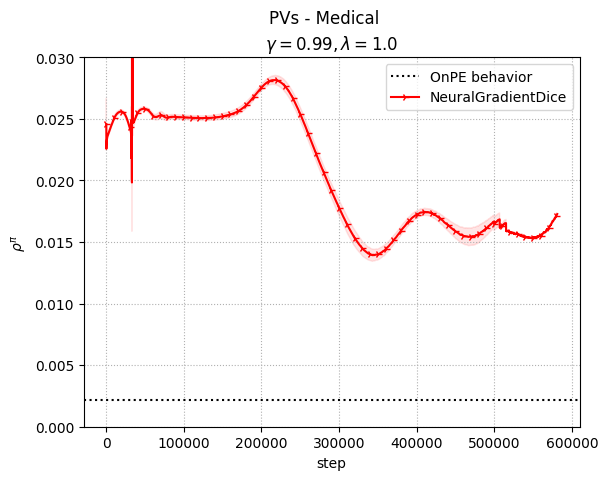

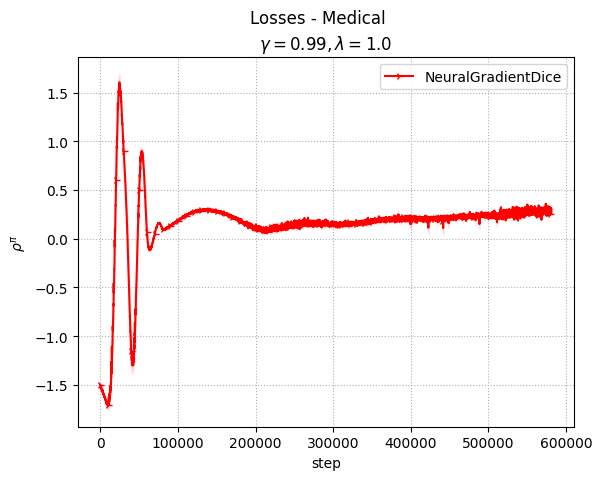

In [188]:
plot("pv", (0, 0.03))
plot("loss")

# All Plots

## DualDice

Getting log: data/medical_rl/outputs/split=(0.4, 0.1, 0.5)_seed=42/n_neurons=1024_learning_rate=0.0001_batch_size=512_gamma=0.99/n_pads=10/NeuralDualDice/gam0.1_nstep100000_batchs1024_hdp(128,)_hdd(128,)_lrp0.0001_lrd0.0001_regp0.0_regd0.0_fexp1.5/events.out.tfevents.1726317242.MacBook-Pro-von-Richard.local.5100.0.v2
Getting log: data/medical_rl/outputs/split=(0.4, 0.1, 0.5)_seed=42/n_neurons=1024_learning_rate=0.0001_batch_size=512_gamma=0.99/n_pads=10/NeuralDualDice/gam0.5_nstep100000_batchs1024_hdp(128,)_hdd(128,)_lrp0.0001_lrd0.0001_regp0.0_regd0.0_fexp1.5/events.out.tfevents.1726325443.MacBook-Pro-von-Richard.local.5100.3.v2
Getting log: data/medical_rl/outputs/split=(0.4, 0.1, 0.5)_seed=42/n_neurons=1024_learning_rate=0.0001_batch_size=512_gamma=0.99/n_pads=10/NeuralDualDice/gam0.9_nstep100000_batchs1024_hdp(128,)_hdd(128,)_lrp0.0001_lrd0.0001_regp0.0_regd0.0_fexp1.5/events.out.tfevents.1726334326.MacBook-Pro-von-Richard.local.5100.6.v2


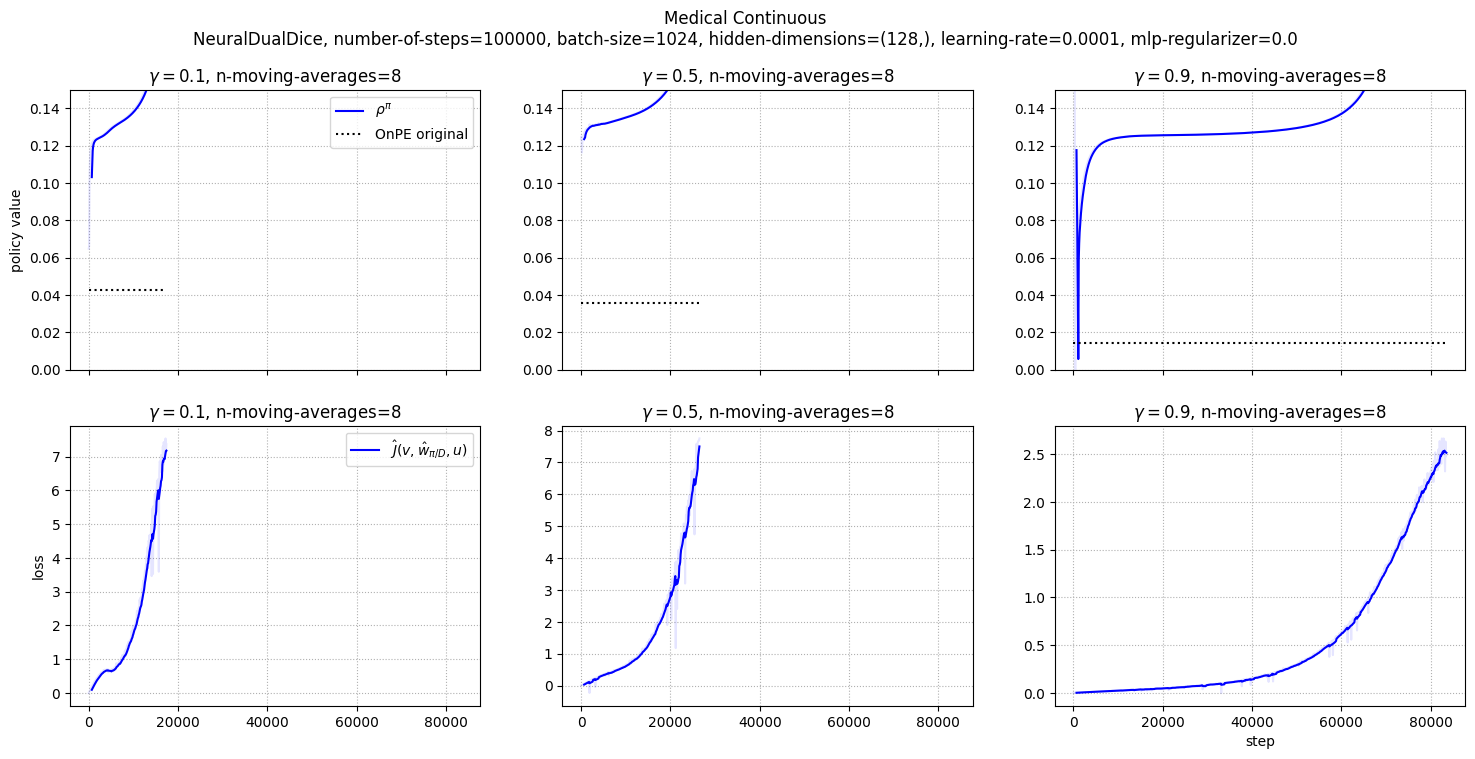

Getting log: data/medical_rl/outputs/split=(0.4, 0.1, 0.5)_seed=42/n_neurons=1024_learning_rate=0.0001_batch_size=512_gamma=0.99/n_pads=10/NeuralDualDice/gam0.1_nstep100000_batchs1024_hdp(128,)_hdd(128,)_lrp5e-05_lrd5e-05_regp0.0_regd0.0_fexp1.5/events.out.tfevents.1726347150.MacBook-Pro-von-Richard.local.5100.9.v2
Getting log: data/medical_rl/outputs/split=(0.4, 0.1, 0.5)_seed=42/n_neurons=1024_learning_rate=0.0001_batch_size=512_gamma=0.99/n_pads=10/NeuralDualDice/gam0.5_nstep100000_batchs1024_hdp(128,)_hdd(128,)_lrp5e-05_lrd5e-05_regp0.0_regd0.0_fexp1.5/events.out.tfevents.1726357616.MacBook-Pro-von-Richard.local.5100.12.v2
Getting log: data/medical_rl/outputs/split=(0.4, 0.1, 0.5)_seed=42/n_neurons=1024_learning_rate=0.0001_batch_size=512_gamma=0.99/n_pads=10/NeuralDualDice/gam0.9_nstep100000_batchs1024_hdp(128,)_hdd(128,)_lrp5e-05_lrd5e-05_regp0.0_regd0.0_fexp1.5/events.out.tfevents.1726368893.MacBook-Pro-von-Richard.local.5100.15.v2


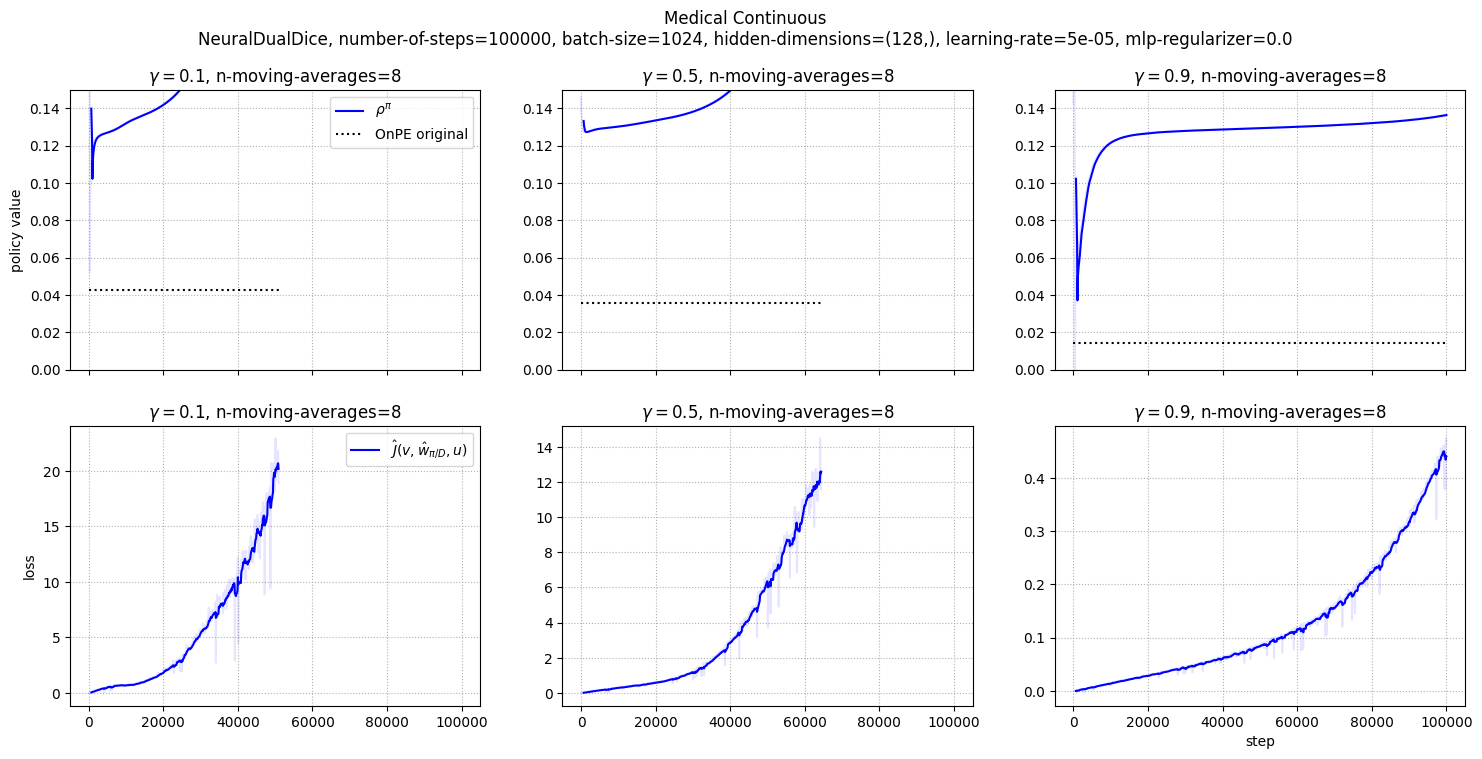

Getting log: data/medical_rl/outputs/split=(0.4, 0.1, 0.5)_seed=42/n_neurons=1024_learning_rate=0.0001_batch_size=512_gamma=0.99/n_pads=10/NeuralDualDice/gam0.1_nstep100000_batchs1024_hdp(128,)_hdd(128,)_lrp1e-05_lrd1e-05_regp0.0_regd0.0_fexp1.5/events.out.tfevents.1726384577.MacBook-Pro-von-Richard.local.5100.18.v2
Getting log: data/medical_rl/outputs/split=(0.4, 0.1, 0.5)_seed=42/n_neurons=1024_learning_rate=0.0001_batch_size=512_gamma=0.99/n_pads=10/NeuralDualDice/gam0.5_nstep100000_batchs1024_hdp(128,)_hdd(128,)_lrp1e-05_lrd1e-05_regp0.0_regd0.0_fexp1.5/events.out.tfevents.1726399816.MacBook-Pro-von-Richard.local.5100.21.v2
Getting log: data/medical_rl/outputs/split=(0.4, 0.1, 0.5)_seed=42/n_neurons=1024_learning_rate=0.0001_batch_size=512_gamma=0.99/n_pads=10/NeuralDualDice/gam0.9_nstep100000_batchs1024_hdp(128,)_hdd(128,)_lrp1e-05_lrd1e-05_regp0.0_regd0.0_fexp1.5/events.out.tfevents.1726421122.MacBook-Pro-von-Richard.local.5100.24.v2


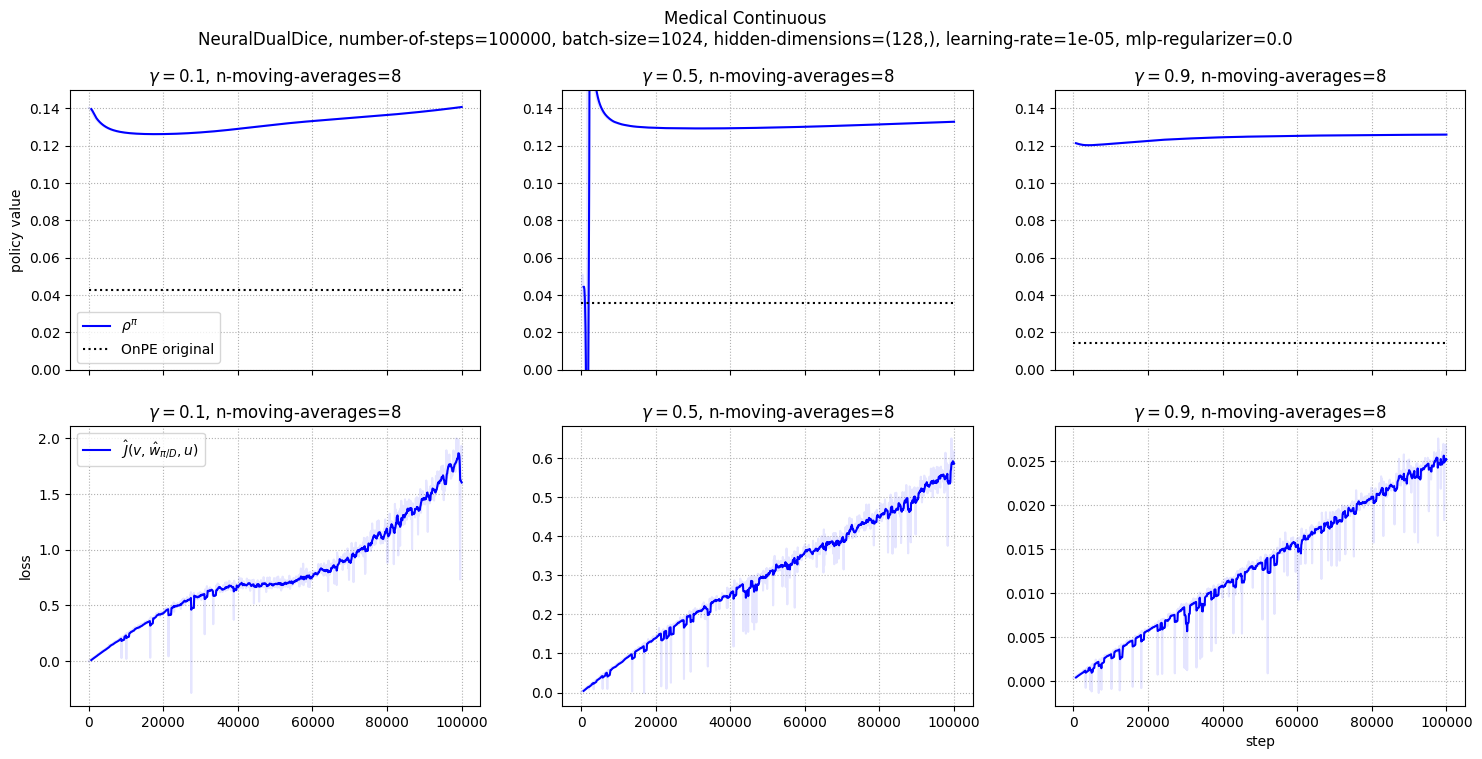

In [12]:
for lr in [1e-4, 5e-5, 1e-5]:
    get_plot_logs(
        get_behavior_policy_value,
        #
        os.path.join(outputs_dir,  hparam_str_dataframe),
        hparam_str_policy, hparam_str_dataset,
        estimator_name="NeuralDualDice", hparam_str_evaluation=[
            f"gam{gam}_nstep100000_batchs1024_hdp(128,)_hdd(128,)_lrp{lr}_lrd{lr}_regp0.0_regd0.0_fexp1.5"
                for gam in [0.1, 0.5, 0.9]
        ],
        n_ma_1=8, n_ma_3=8,
        ylim_1=(0, 0.15),
    )

## GenDice

Getting log: data/medical_rl/outputs/split=(0.4, 0.1, 0.5)_seed=42/n_neurons=1024_learning_rate=0.0001_batch_size=512_gamma=0.99/n_pads=10/NeuralGenDice/gam0.1_nstep100000_batchs1024_hdp(128,)_hdd(128,)_lrp0.0001_lrd0.0001_regp0.0_regd0.0_nlr0.0001_nreg1.0/events.out.tfevents.1726318272.MacBook-Pro-von-Richard.local.5100.1.v2
Getting log: data/medical_rl/outputs/split=(0.4, 0.1, 0.5)_seed=42/n_neurons=1024_learning_rate=0.0001_batch_size=512_gamma=0.99/n_pads=10/NeuralGenDice/gam0.5_nstep100000_batchs1024_hdp(128,)_hdd(128,)_lrp0.0001_lrd0.0001_regp0.0_regd0.0_nlr0.0001_nreg1.0/events.out.tfevents.1726327087.MacBook-Pro-von-Richard.local.5100.4.v2
Getting log: data/medical_rl/outputs/split=(0.4, 0.1, 0.5)_seed=42/n_neurons=1024_learning_rate=0.0001_batch_size=512_gamma=0.99/n_pads=10/NeuralGenDice/gam0.9_nstep100000_batchs1024_hdp(128,)_hdd(128,)_lrp0.0001_lrd0.0001_regp0.0_regd0.0_nlr0.0001_nreg1.0/events.out.tfevents.1726339466.MacBook-Pro-von-Richard.local.5100.7.v2


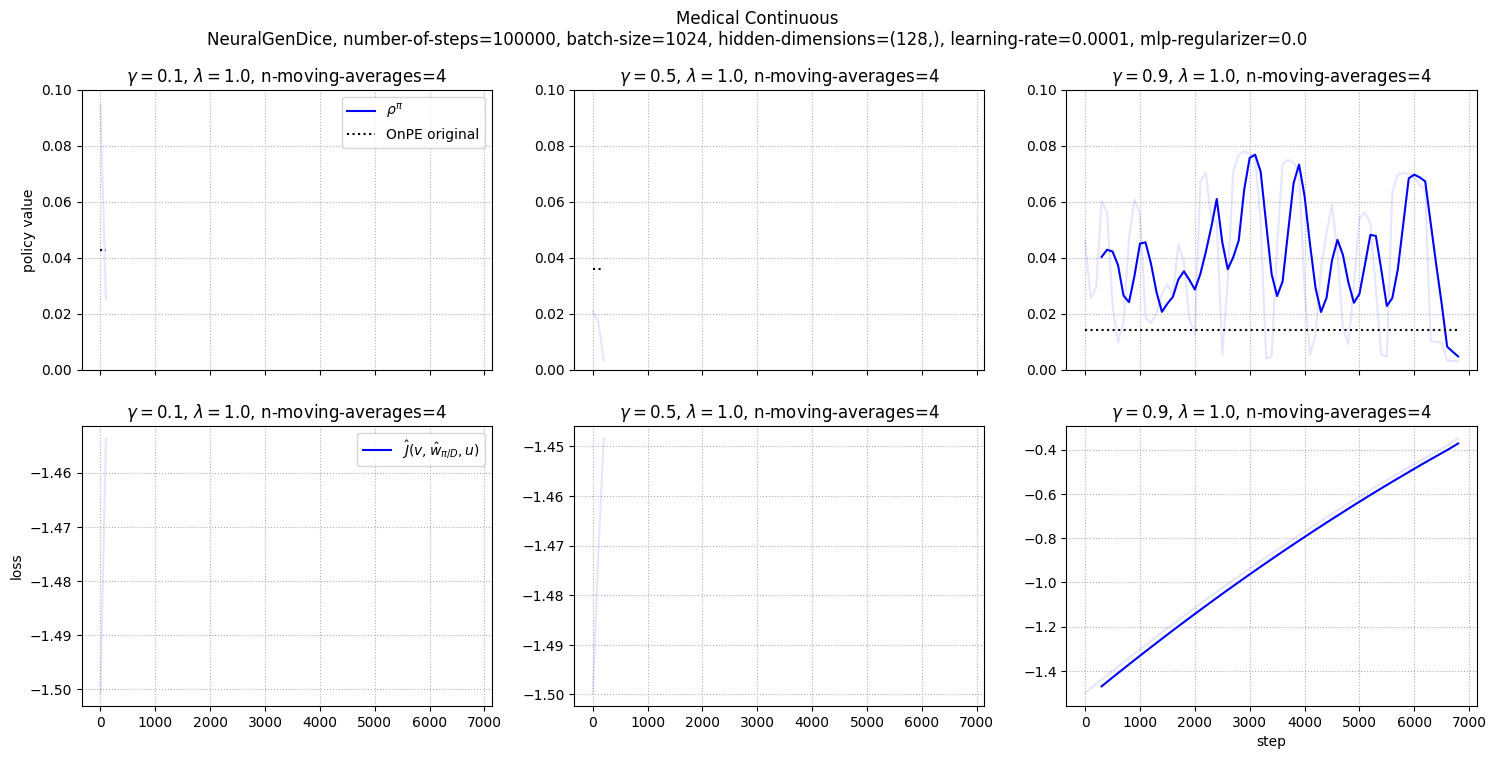

Getting log: data/medical_rl/outputs/split=(0.4, 0.1, 0.5)_seed=42/n_neurons=1024_learning_rate=0.0001_batch_size=512_gamma=0.99/n_pads=10/NeuralGenDice/gam0.1_nstep100000_batchs1024_hdp(128,)_hdd(128,)_lrp5e-05_lrd5e-05_regp0.0_regd0.0_nlr5e-05_nreg1.0/events.out.tfevents.1726350291.MacBook-Pro-von-Richard.local.5100.10.v2
Getting log: data/medical_rl/outputs/split=(0.4, 0.1, 0.5)_seed=42/n_neurons=1024_learning_rate=0.0001_batch_size=512_gamma=0.99/n_pads=10/NeuralGenDice/gam0.5_nstep100000_batchs1024_hdp(128,)_hdd(128,)_lrp5e-05_lrd5e-05_regp0.0_regd0.0_nlr5e-05_nreg1.0/events.out.tfevents.1726361592.MacBook-Pro-von-Richard.local.5100.13.v2
Getting log: data/medical_rl/outputs/split=(0.4, 0.1, 0.5)_seed=42/n_neurons=1024_learning_rate=0.0001_batch_size=512_gamma=0.99/n_pads=10/NeuralGenDice/gam0.9_nstep100000_batchs1024_hdp(128,)_hdd(128,)_lrp5e-05_lrd5e-05_regp0.0_regd0.0_nlr5e-05_nreg1.0/events.out.tfevents.1726375079.MacBook-Pro-von-Richard.local.5100.16.v2


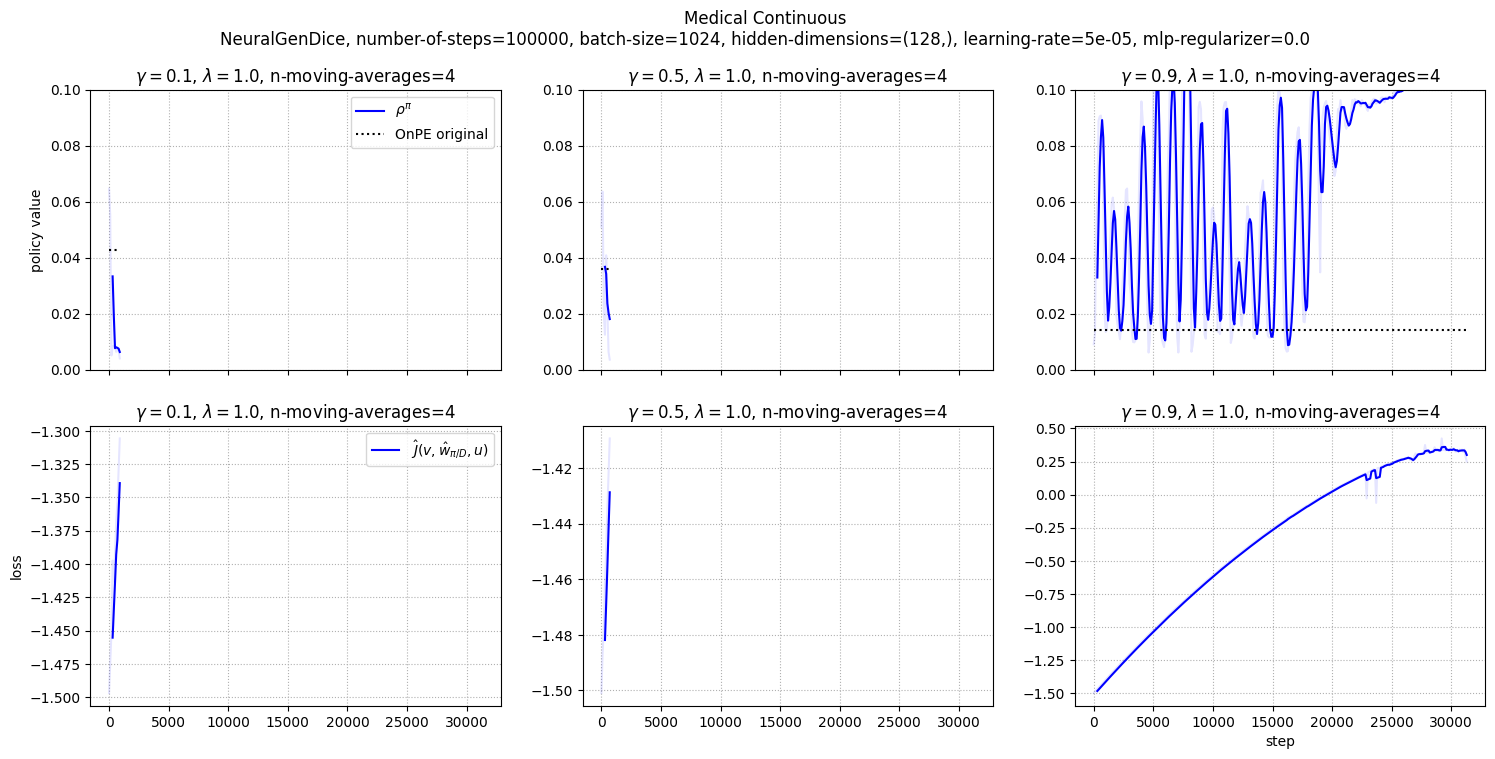

Getting log: data/medical_rl/outputs/split=(0.4, 0.1, 0.5)_seed=42/n_neurons=1024_learning_rate=0.0001_batch_size=512_gamma=0.99/n_pads=10/NeuralGenDice/gam0.1_nstep100000_batchs1024_hdp(128,)_hdd(128,)_lrp1e-05_lrd1e-05_regp0.0_regd0.0_nlr1e-05_nreg1.0/events.out.tfevents.1726390766.MacBook-Pro-von-Richard.local.5100.19.v2
Getting log: data/medical_rl/outputs/split=(0.4, 0.1, 0.5)_seed=42/n_neurons=1024_learning_rate=0.0001_batch_size=512_gamma=0.99/n_pads=10/NeuralGenDice/gam0.5_nstep100000_batchs1024_hdp(128,)_hdd(128,)_lrp1e-05_lrd1e-05_regp0.0_regd0.0_nlr1e-05_nreg1.0/events.out.tfevents.1726406216.MacBook-Pro-von-Richard.local.5100.22.v2
Getting log: data/medical_rl/outputs/split=(0.4, 0.1, 0.5)_seed=42/n_neurons=1024_learning_rate=0.0001_batch_size=512_gamma=0.99/n_pads=10/NeuralGenDice/gam0.9_nstep100000_batchs1024_hdp(128,)_hdd(128,)_lrp1e-05_lrd1e-05_regp0.0_regd0.0_nlr1e-05_nreg1.0/events.out.tfevents.1726427396.MacBook-Pro-von-Richard.local.5100.25.v2


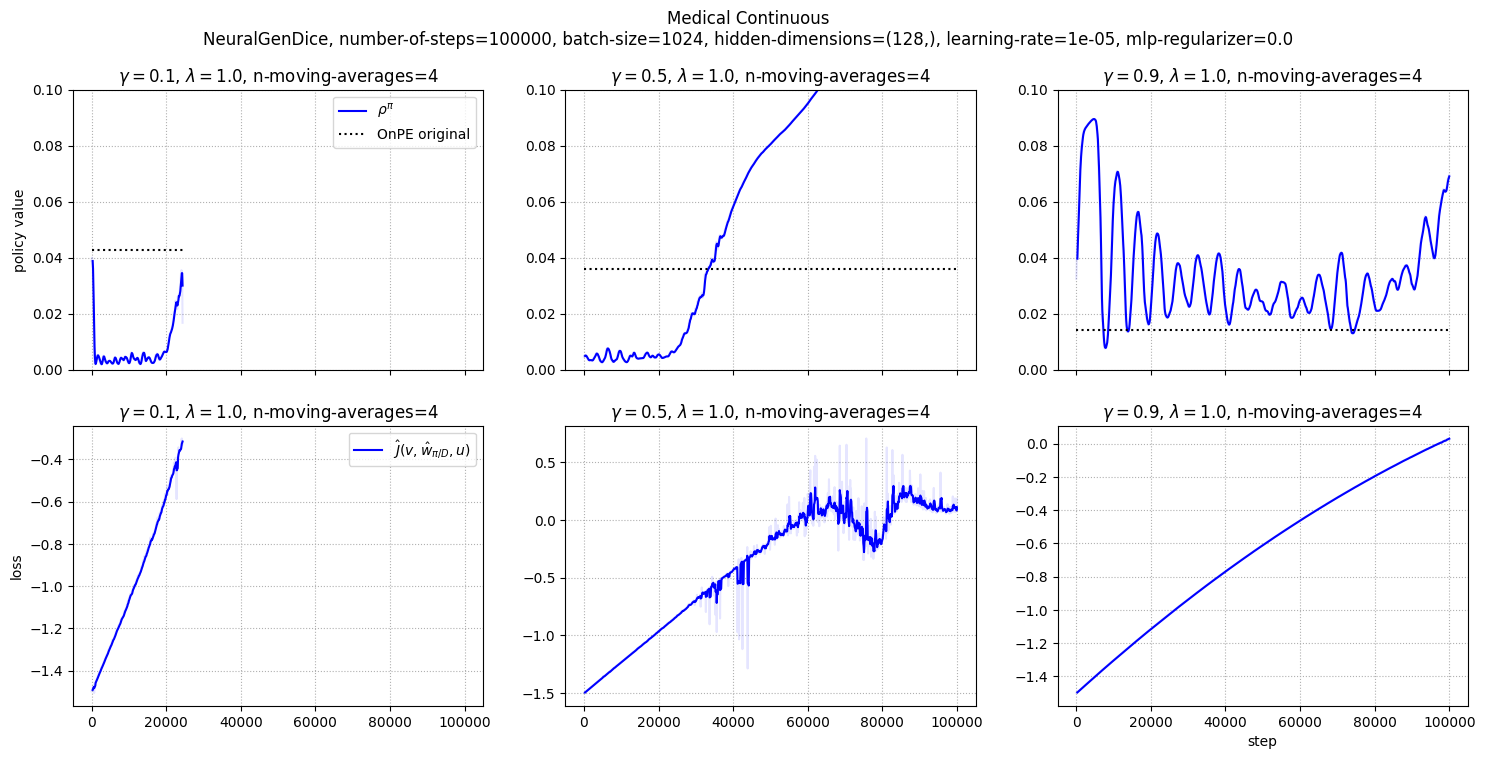

In [52]:
for lr in [1e-4, 5e-5, 1e-5]:
    get_plot_logs(
        get_behavior_policy_value,
        #
        os.path.join(outputs_dir,  hparam_str_dataframe),
        hparam_str_policy, hparam_str_dataset,
        estimator_name="NeuralGenDice", hparam_str_evaluation=[
            f"gam{gam}_nstep100000_batchs1024_hdp(128,)_hdd(128,)_lrp{lr}_lrd{lr}_regp0.0_regd0.0_nlr{lr}_nreg1.0"
                for gam in [0.1, 0.5, 0.9]
        ],
        n_ma_1=4, n_ma_3=4,
        ylim_1=(0, 0.1),
    )

## GradientDice

Getting log: data/medical_rl/outputs/split=(0.4, 0.1, 0.5)_seed=42/n_neurons=1024_learning_rate=0.0001_batch_size=512_gamma=0.99/n_pads=10/NeuralGradientDice/gam0.1_nstep500000_batchs1024_hdp(128,)_hdd(128,)_lrp1e-05_lrd1e-05_regp0.0_regd0.0_nlr1e-05_nreg1.0/events.out.tfevents.1727858312.MacBook-Pro-von-Richard.local.50199.0.v2
Getting log: data/medical_rl/outputs/split=(0.4, 0.1, 0.5)_seed=42/n_neurons=1024_learning_rate=0.0001_batch_size=512_gamma=0.99/n_pads=10/NeuralGradientDice/gam0.5_nstep500000_batchs1024_hdp(128,)_hdd(128,)_lrp1e-05_lrd1e-05_regp0.0_regd0.0_nlr1e-05_nreg1.0/events.out.tfevents.1727895836.MacBook-Pro-von-Richard.local.50199.1.v2
Getting log: data/medical_rl/outputs/split=(0.4, 0.1, 0.5)_seed=42/n_neurons=1024_learning_rate=0.0001_batch_size=512_gamma=0.99/n_pads=10/NeuralGradientDice/gam0.9_nstep500000_batchs1024_hdp(128,)_hdd(128,)_lrp1e-05_lrd1e-05_regp0.0_regd0.0_nlr1e-05_nreg1.0/events.out.tfevents.1727937628.MacBook-Pro-von-Richard.local.50199.2.v2


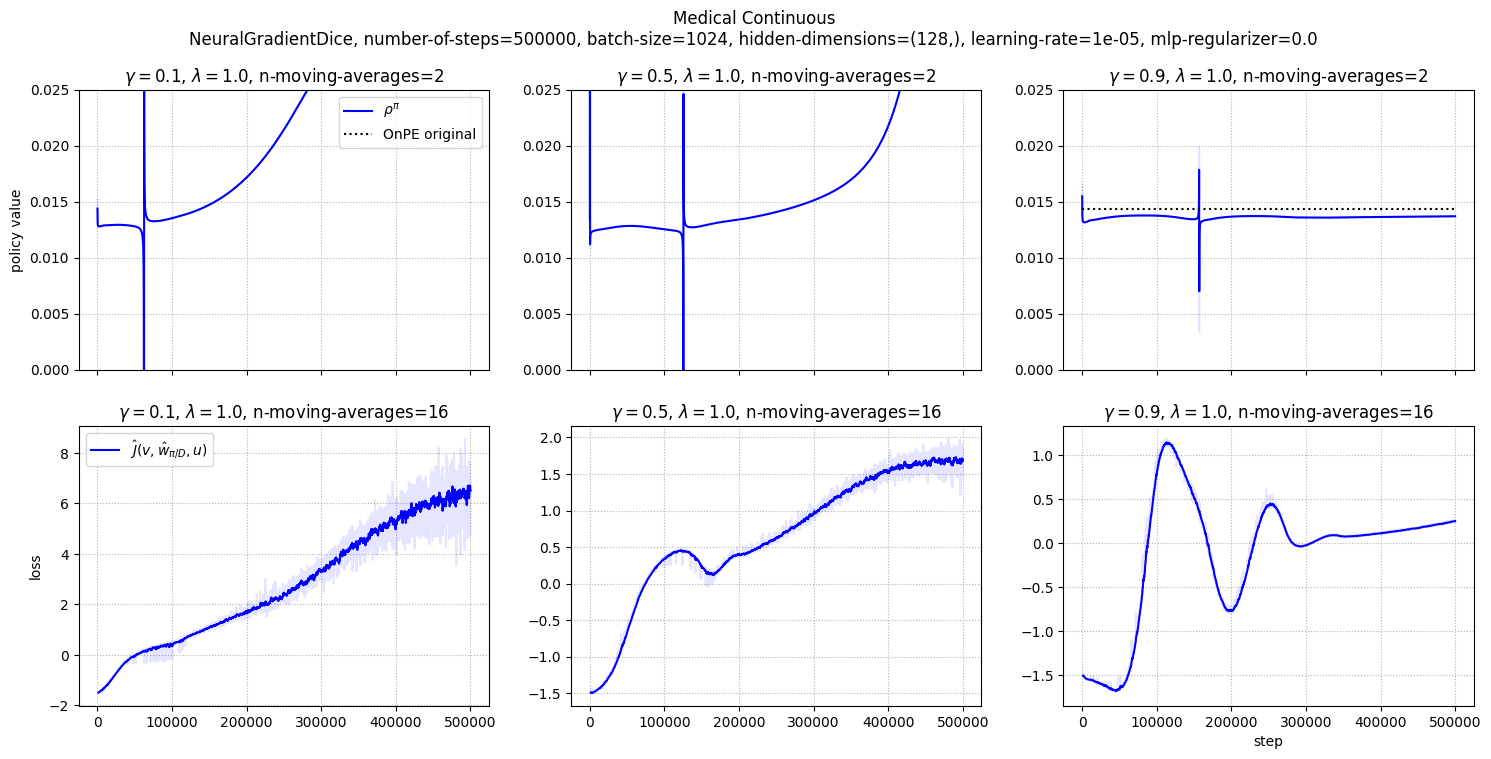

In [51]:
for lr in [1e-5]:
    get_plot_logs(
        get_behavior_policy_value,
        #
        os.path.join(outputs_dir,  hparam_str_dataframe),
        hparam_str_policy, hparam_str_dataset,
        estimator_name="NeuralGradientDice", hparam_str_evaluation=[
            f"gam{gam}_nstep500000_batchs1024_hdp(128,)_hdd(128,)_lrp{lr}_lrd{lr}_regp0.0_regd0.0_nlr{lr}_nreg1.0"
                for gam in [0.1, 0.5, 0.9]
        ],
        ylim_1=(0, 0.025),
        n_ma_1=2, n_ma_3=16,
    )

Getting log: data/medical_rl/outputs/split=(0.4, 0.1, 0.5)_seed=42/n_neurons=1024_learning_rate=0.0001_batch_size=512_gamma=0.99/n_pads=10/NeuralGradientDice/gam0.1_nstep300000_batchs1024_hdp(128,)_hdd(128,)_lrp0.0001_lrd0.0001_regp0.0_regd0.0_nlr0.0001_nreg1.0/events.out.tfevents.1726581341.MacBook-Pro-von-Richard.local.66528.0.v2
Getting log: data/medical_rl/outputs/split=(0.4, 0.1, 0.5)_seed=42/n_neurons=1024_learning_rate=0.0001_batch_size=512_gamma=0.99/n_pads=10/NeuralGradientDice/gam0.5_nstep300000_batchs1024_hdp(128,)_hdd(128,)_lrp0.0001_lrd0.0001_regp0.0_regd0.0_nlr0.0001_nreg1.0/events.out.tfevents.1726603947.MacBook-Pro-von-Richard.local.66528.1.v2
Getting log: data/medical_rl/outputs/split=(0.4, 0.1, 0.5)_seed=42/n_neurons=1024_learning_rate=0.0001_batch_size=512_gamma=0.99/n_pads=10/NeuralGradientDice/gam0.9_nstep300000_batchs1024_hdp(128,)_hdd(128,)_lrp0.0001_lrd0.0001_regp0.0_regd0.0_nlr0.0001_nreg1.0/events.out.tfevents.1726625872.MacBook-Pro-von-Richard.local.66528.2.v

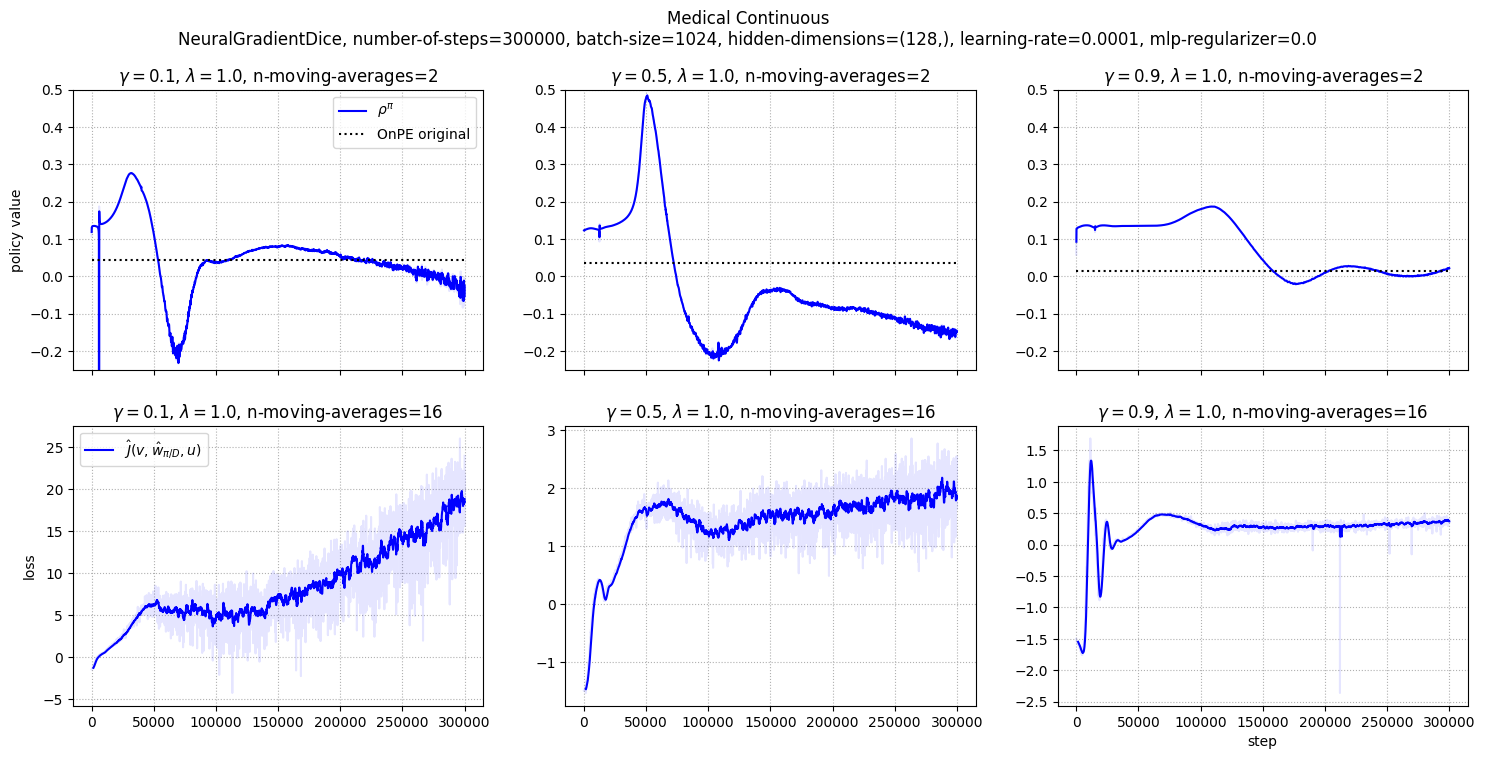

In [26]:
for lr in [1e-4]:
    get_plot_logs(
        get_behavior_policy_value,
        #
        os.path.join(outputs_dir,  hparam_str_dataframe),
        hparam_str_policy, hparam_str_dataset,
        estimator_name="NeuralGradientDice", hparam_str_evaluation=[
            f"gam{gam}_nstep300000_batchs1024_hdp(128,)_hdd(128,)_lrp{lr}_lrd{lr}_regp0.0_regd0.0_nlr{lr}_nreg1.0"
                for gam in [0.1, 0.5, 0.9]
        ],
        n_ma_1=2, n_ma_3=16,
        ylim_1=(-0.25, 0.5),
    )

Getting log: data/medical_rl/outputs/split=(0.4, 0.1, 0.5)_seed=42/n_neurons=1024_learning_rate=0.0001_batch_size=512_gamma=0.99/n_pads=10/NeuralGradientDice/gam0.1_nstep100000_batchs1024_hdp(128,)_hdd(128,)_lrp0.0001_lrd0.0001_regp0.0_regd0.0_nlr0.0001_nreg1.0/events.out.tfevents.1726318282.MacBook-Pro-von-Richard.local.5100.2.v2
Getting log: data/medical_rl/outputs/split=(0.4, 0.1, 0.5)_seed=42/n_neurons=1024_learning_rate=0.0001_batch_size=512_gamma=0.99/n_pads=10/NeuralGradientDice/gam0.5_nstep100000_batchs1024_hdp(128,)_hdd(128,)_lrp0.0001_lrd0.0001_regp0.0_regd0.0_nlr0.0001_nreg1.0/events.out.tfevents.1726327106.MacBook-Pro-von-Richard.local.5100.5.v2
Getting log: data/medical_rl/outputs/split=(0.4, 0.1, 0.5)_seed=42/n_neurons=1024_learning_rate=0.0001_batch_size=512_gamma=0.99/n_pads=10/NeuralGradientDice/gam0.9_nstep100000_batchs1024_hdp(128,)_hdd(128,)_lrp0.0001_lrd0.0001_regp0.0_regd0.0_nlr0.0001_nreg1.0/events.out.tfevents.1726339957.MacBook-Pro-von-Richard.local.5100.8.v2


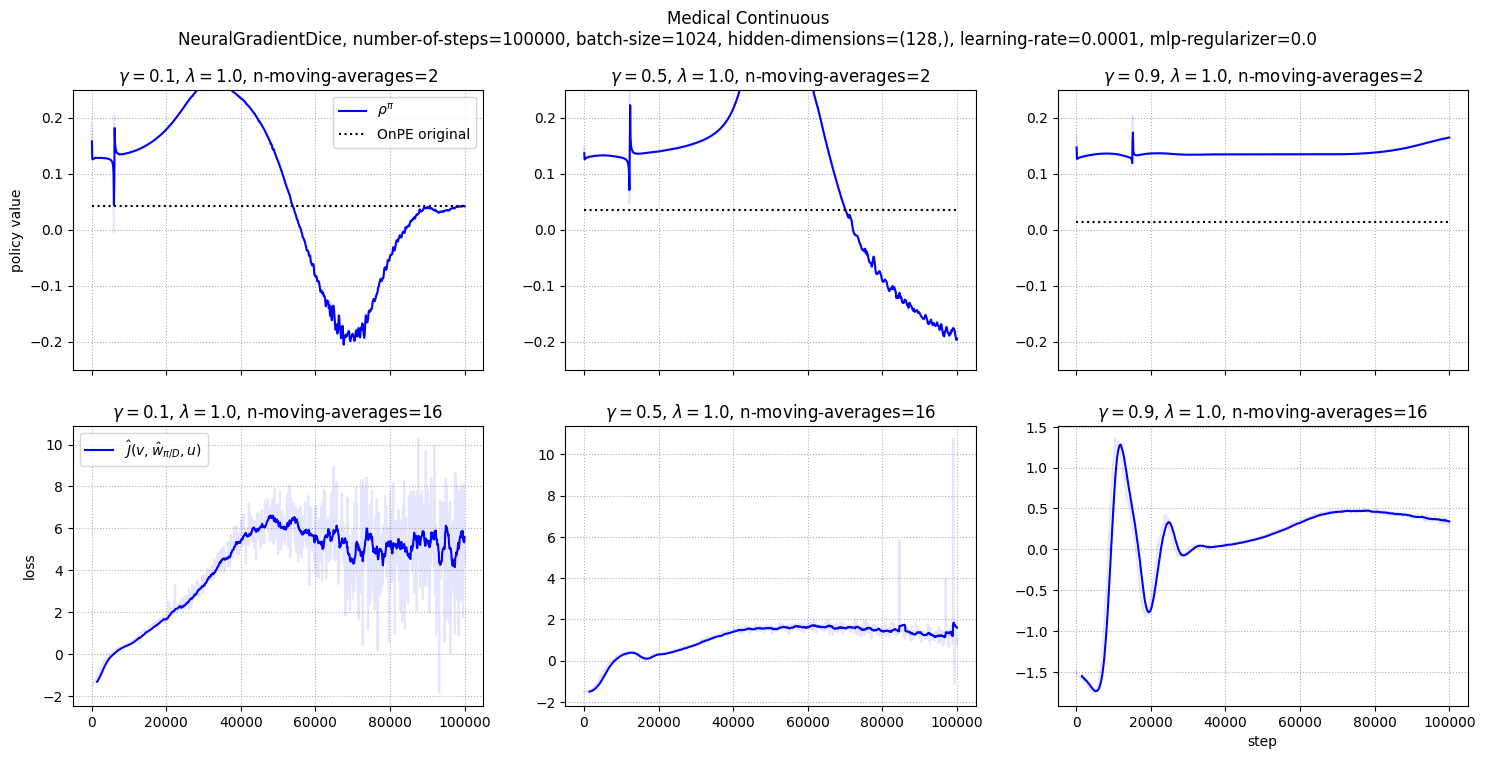

Getting log: data/medical_rl/outputs/split=(0.4, 0.1, 0.5)_seed=42/n_neurons=1024_learning_rate=0.0001_batch_size=512_gamma=0.99/n_pads=10/NeuralGradientDice/gam0.1_nstep100000_batchs1024_hdp(128,)_hdd(128,)_lrp5e-05_lrd5e-05_regp0.0_regd0.0_nlr5e-05_nreg1.0/events.out.tfevents.1726350364.MacBook-Pro-von-Richard.local.5100.11.v2
Getting log: data/medical_rl/outputs/split=(0.4, 0.1, 0.5)_seed=42/n_neurons=1024_learning_rate=0.0001_batch_size=512_gamma=0.99/n_pads=10/NeuralGradientDice/gam0.5_nstep100000_batchs1024_hdp(128,)_hdd(128,)_lrp5e-05_lrd5e-05_regp0.0_regd0.0_nlr5e-05_nreg1.0/events.out.tfevents.1726361646.MacBook-Pro-von-Richard.local.5100.14.v2
Getting log: data/medical_rl/outputs/split=(0.4, 0.1, 0.5)_seed=42/n_neurons=1024_learning_rate=0.0001_batch_size=512_gamma=0.99/n_pads=10/NeuralGradientDice/gam0.9_nstep100000_batchs1024_hdp(128,)_hdd(128,)_lrp5e-05_lrd5e-05_regp0.0_regd0.0_nlr5e-05_nreg1.0/events.out.tfevents.1726377336.MacBook-Pro-von-Richard.local.5100.17.v2


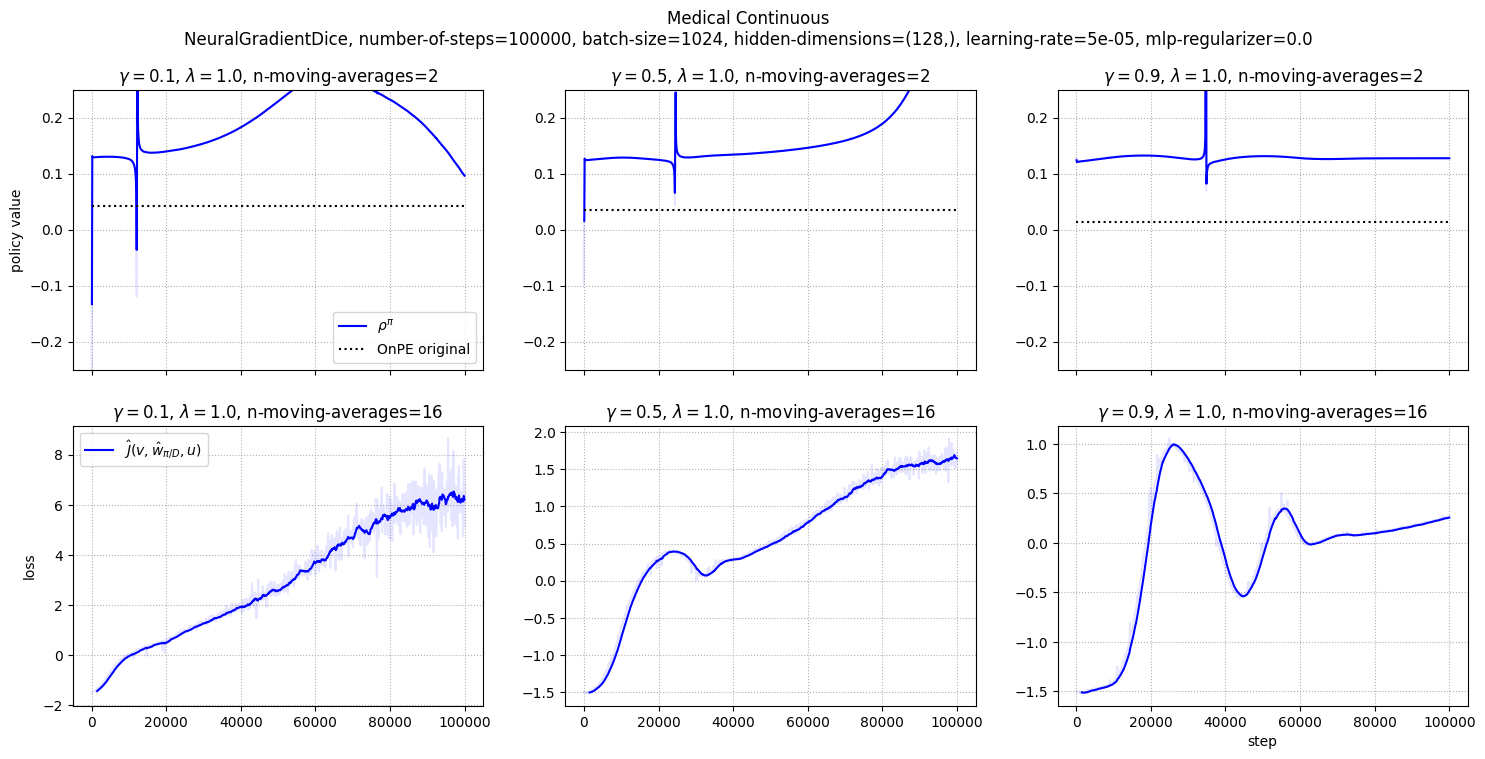

Getting log: data/medical_rl/outputs/split=(0.4, 0.1, 0.5)_seed=42/n_neurons=1024_learning_rate=0.0001_batch_size=512_gamma=0.99/n_pads=10/NeuralGradientDice/gam0.1_nstep100000_batchs1024_hdp(128,)_hdd(128,)_lrp1e-05_lrd1e-05_regp0.0_regd0.0_nlr1e-05_nreg1.0/events.out.tfevents.1726392526.MacBook-Pro-von-Richard.local.5100.20.v2
Getting log: data/medical_rl/outputs/split=(0.4, 0.1, 0.5)_seed=42/n_neurons=1024_learning_rate=0.0001_batch_size=512_gamma=0.99/n_pads=10/NeuralGradientDice/gam0.5_nstep100000_batchs1024_hdp(128,)_hdd(128,)_lrp1e-05_lrd1e-05_regp0.0_regd0.0_nlr1e-05_nreg1.0/events.out.tfevents.1726413774.MacBook-Pro-von-Richard.local.5100.23.v2
Getting log: data/medical_rl/outputs/split=(0.4, 0.1, 0.5)_seed=42/n_neurons=1024_learning_rate=0.0001_batch_size=512_gamma=0.99/n_pads=10/NeuralGradientDice/gam0.9_nstep100000_batchs1024_hdp(128,)_hdd(128,)_lrp1e-05_lrd1e-05_regp0.0_regd0.0_nlr1e-05_nreg1.0/events.out.tfevents.1726434758.MacBook-Pro-von-Richard.local.5100.26.v2


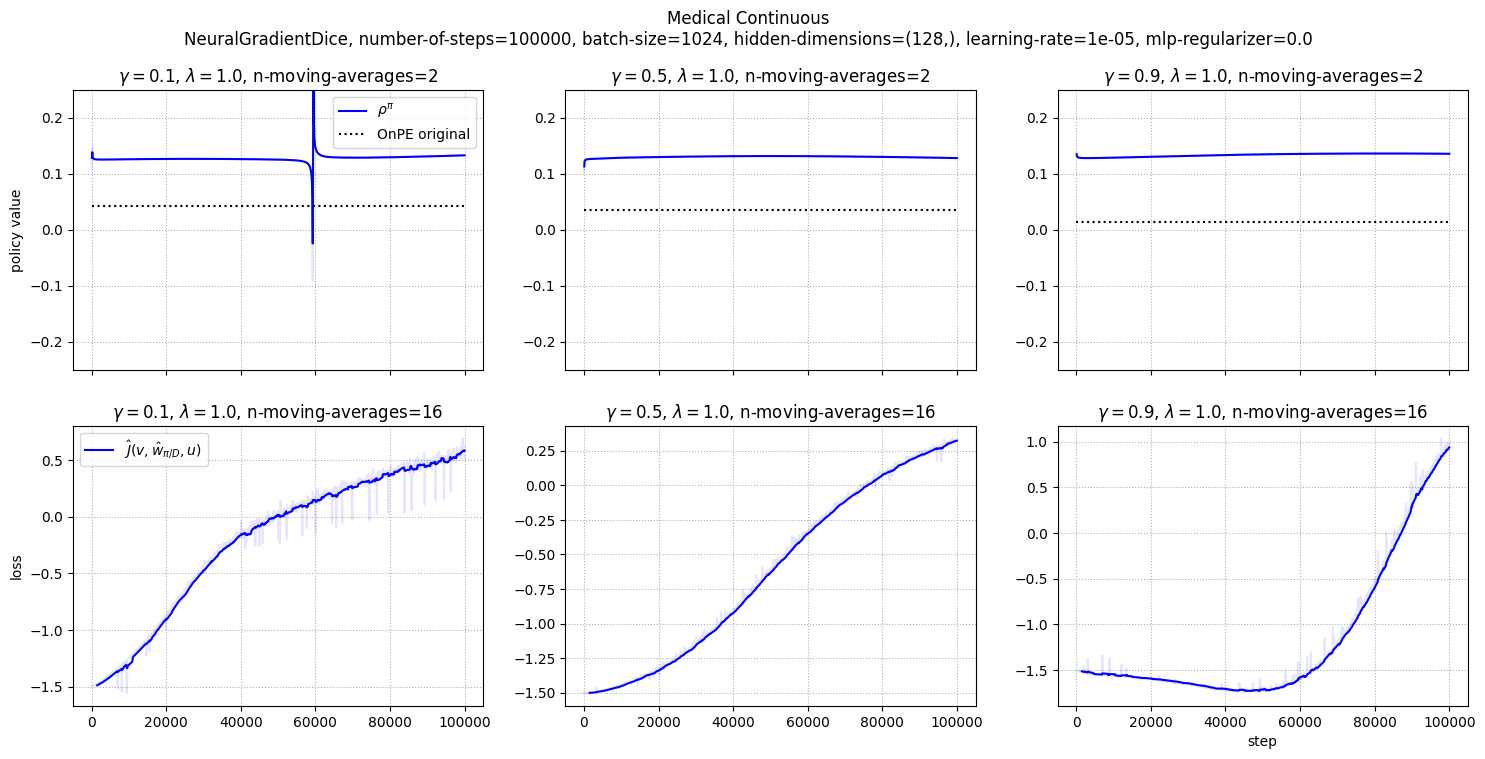

In [27]:
for lr in [1e-4, 5e-5, 1e-5]:
    get_plot_logs(
        get_behavior_policy_value,
        #
        os.path.join(outputs_dir,  hparam_str_dataframe),
        hparam_str_policy, hparam_str_dataset,
        estimator_name="NeuralGradientDice", hparam_str_evaluation=[
            f"gam{gam}_nstep100000_batchs1024_hdp(128,)_hdd(128,)_lrp{lr}_lrd{lr}_regp0.0_regd0.0_nlr{lr}_nreg1.0"
                for gam in [0.1, 0.5, 0.9]
        ],
        n_ma_1=2, n_ma_3=16,
        ylim_1=(-0.25, 0.25),
    )

Getting log: data/medical_rl/outputs/split=(0.4, 0.1, 0.5)_seed=42/n_neurons=1024_learning_rate=0.0001_batch_size=512_gamma=0.99/n_pads=1/NeuralGradientDice/gam0.1_nstep500000_batchs1024_hdp(128,)_hdd(128,)_lrp5e-05_lrd5e-05_regp0.0_regd0.0_nlr5e-05_nreg1.0/events.out.tfevents.1727434196.MacBook-Pro-von-Richard.local.63281.0.v2
Getting log: data/medical_rl/outputs/split=(0.4, 0.1, 0.5)_seed=42/n_neurons=1024_learning_rate=0.0001_batch_size=512_gamma=0.99/n_pads=1/NeuralGradientDice/gam0.5_nstep500000_batchs1024_hdp(128,)_hdd(128,)_lrp5e-05_lrd5e-05_regp0.0_regd0.0_nlr5e-05_nreg1.0/events.out.tfevents.1727481450.MacBook-Pro-von-Richard.local.63281.1.v2
Getting log: data/medical_rl/outputs/split=(0.4, 0.1, 0.5)_seed=42/n_neurons=1024_learning_rate=0.0001_batch_size=512_gamma=0.99/n_pads=1/NeuralGradientDice/gam0.9_nstep500000_batchs1024_hdp(128,)_hdd(128,)_lrp5e-05_lrd5e-05_regp0.0_regd0.0_nlr5e-05_nreg1.0/events.out.tfevents.1727517509.MacBook-Pro-von-Richard.local.63281.2.v2


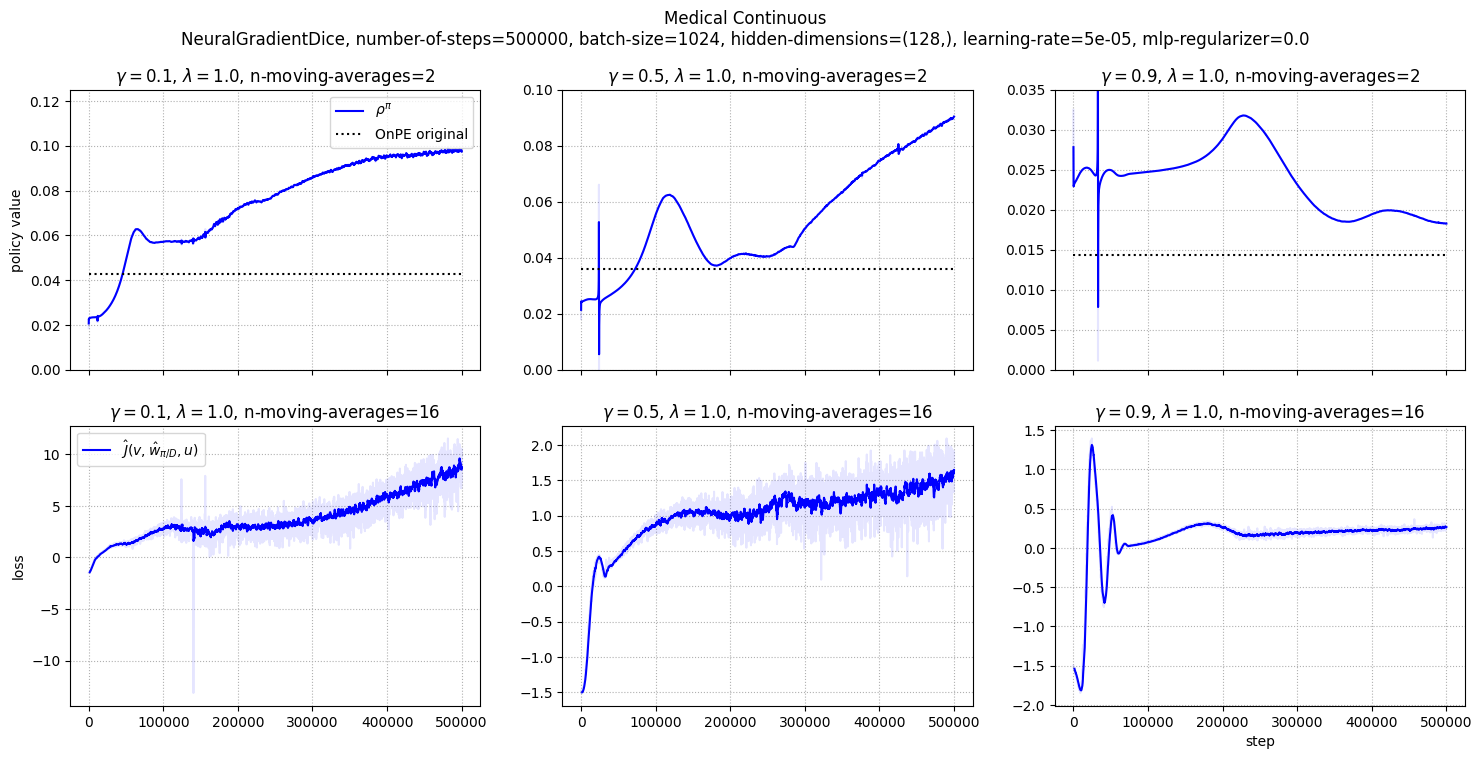

In [121]:
for lr in [5e-5]:
    get_plot_logs(
        get_behavior_policy_value,
        #
        os.path.join(outputs_dir,  hparam_str_dataframe),
        hparam_str_policy, "n_pads=1",
        estimator_name="NeuralGradientDice", hparam_str_evaluation=[
            f"gam{gam}_nstep500000_batchs1024_hdp(128,)_hdd(128,)_lrp{lr}_lrd{lr}_regp0.0_regd0.0_nlr{lr}_nreg1.0"
                for gam in [0.1, 0.5, 0.9]
        ],
        n_ma_1=2, n_ma_3=16,
        ylim_1=[(0, 0.125), (0, 0.1), (0, 0.035)],
    )

# Test